In [1]:
import pandas as pd
import arff
import warnings
warnings.filterwarnings('ignore')

data_freq = arff.load('/Users/ayseljafarova/Desktop/Huk Coburg/freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq , columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge", "DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"] )
data_sev = arff.load('/Users/ayseljafarova/Desktop/Huk Coburg/freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

In [2]:
df_freq.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'


In [3]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


In [4]:
df_sev.head()

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00


In [5]:
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


In [6]:
#Left join we want to keep all policies from freMTPL2freq, even if they have no claims
data = pd.merge(df_freq, df_sev, on='IDpol', how='left')
data.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',NaN
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',NaN
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22',NaN
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',NaN
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679513 entries, 0 to 679512
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        679513 non-null  float64
 1   ClaimNb      679513 non-null  float64
 2   Exposure     679513 non-null  float64
 3   Area         679513 non-null  object 
 4   VehPower     679513 non-null  float64
 5   VehAge       679513 non-null  float64
 6   DrivAge      679513 non-null  float64
 7   BonusMalus   679513 non-null  float64
 8   VehBrand     679513 non-null  object 
 9   VehGas       679513 non-null  object 
 10  Density      679513 non-null  float64
 11  Region       679513 non-null  object 
 12  ClaimAmount  26444 non-null   float64
dtypes: float64(9), object(4)
memory usage: 67.4+ MB


In [8]:
data.VehBrand.value_counts()

VehBrand
'B12'    166398
'B1'     163125
'B2'     160179
'B3'      53520
'B5'      34835
'B6'      28611
'B4'      25225
'B10'     17740
'B11'     13623
'B13'     12206
'B14'      4051
Name: count, dtype: int64

In [9]:
data.VehPower.value_counts().sort_index()

VehPower
4.0     115640
5.0     125101
6.0     149305
7.0     145687
8.0      47046
9.0      30147
10.0     31434
11.0     18401
12.0      8231
13.0      3234
14.0      2358
15.0      2929
Name: count, dtype: int64

In [10]:
data.Exposure.value_counts().sort_index()

Exposure
0.002732    1060
0.002740    2045
0.005464     609
0.005479    1397
0.008197     620
            ... 
1.930000       1
1.980000       1
1.990000       1
2.000000       1
2.010000       2
Name: count, Length: 181, dtype: int64

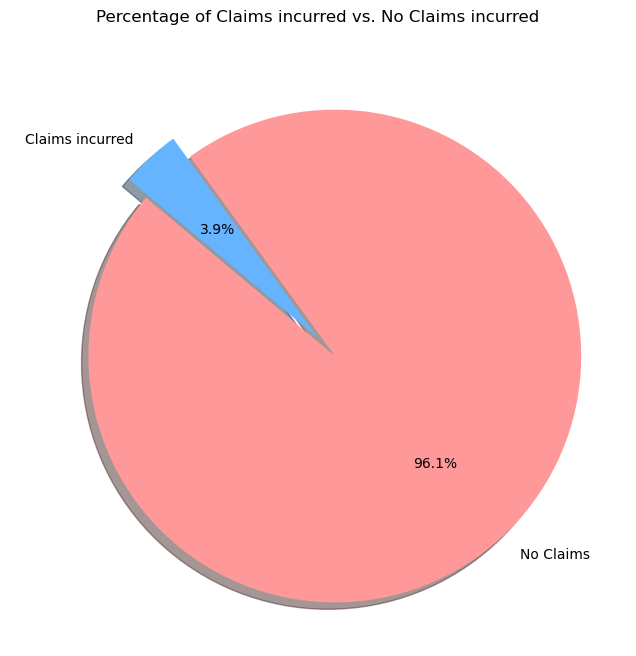

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


null_count = data['ClaimAmount'].isnull().sum()
non_null_count = data['ClaimAmount'].notnull().sum()


labels = ['No Claims', 'Claims incurred']
sizes = [null_count, non_null_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  


plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Claims incurred vs. No Claims incurred')
plt.show()

In [12]:
data["ClaimNb"].value_counts()

ClaimNb
0.0     643953
1.0      32178
2.0       3082
3.0        206
11.0        23
4.0         22
16.0        16
5.0         10
9.0          9
8.0          8
6.0          6
Name: count, dtype: int64

In [13]:
data['IDpol'].unique().shape[0]

678013

In [14]:
data.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount'],
      dtype='object')

In [15]:
# Aggregated the data by 'IDpol'
aggregated_data = data.groupby('IDpol').agg({
    'ClaimAmount': 'sum',
    'ClaimNb': 'count',
    'Exposure': 'sum',
    'Area': 'first',
    'VehPower': 'first',
    'VehAge': 'first',
    'DrivAge': 'first',
    'BonusMalus': 'first',
    'VehBrand': 'first',
    'VehGas': 'first',
    'Density': 'first',
    'Region': 'first'
}).reset_index()

print(aggregated_data.shape)
aggregated_data.head()

(678013, 13)


,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,0.0,1,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,0.0,1,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,0.0,1,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,0.0,1,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,0.0,1,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'


In [16]:
data.IDpol.dtype

dtype('float64')

In [17]:
value_counts = data['IDpol'].value_counts()

ids_to_keep = value_counts[value_counts > 1].index
filtered_data = data[data['IDpol'].isin(ids_to_keep)]
print(data.shape)
print(filtered_data.shape)

ids_larger_than_1 = value_counts[value_counts > 1]
count_ids_larger_than_1 = len(ids_larger_than_1)
print(f"Number of unique 'IDpol' entries that appear more than once: {count_ids_larger_than_1}")
print(f"Number of unique 'IDpol' entries in the data: {data['IDpol'].nunique()}")

(679513, 13)
(2873, 13)
Number of unique 'IDpol' entries that appear more than once: 1373
Number of unique 'IDpol' entries in the data: 678013


In [18]:
data.ClaimNb.value_counts()

ClaimNb
0.0     643953
1.0      32178
2.0       3082
3.0        206
11.0        23
4.0         22
16.0        16
5.0         10
9.0          9
8.0          8
6.0          6
Name: count, dtype: int64

In [19]:
data.IDpol.nunique()

678013

In [20]:
data.head(30)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',NaN
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',NaN
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22',NaN
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',NaN
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',NaN
5,13.0,1.0,0.52,'E',6.0,2.0,38.0,50.0,'B12',Regular,3003.0,'R31',NaN
6,15.0,1.0,0.45,'E',6.0,2.0,38.0,50.0,'B12',Regular,3003.0,'R31',NaN
7,17.0,1.0,0.27,'C',7.0,0.0,33.0,68.0,'B12',Diesel,137.0,'R91',NaN
8,18.0,1.0,0.71,'C',7.0,0.0,33.0,68.0,'B12',Diesel,137.0,'R91',NaN
9,21.0,1.0,0.15,'B',7.0,0.0,41.0,50.0,'B12',Diesel,60.0,'R52',NaN


In [21]:
data.loc[data['IDpol'] == 424.0]

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
205,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',989.64
206,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',9844.36


In [22]:
aggregated_data.loc[aggregated_data['IDpol'] == 2241683.0]

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
321248,2241683.0,35529.37,16,5.28,'D',4.0,12.0,52.0,50.0,'B1',Regular,824.0,'R91'


In [23]:
aggregated_data.loc[(aggregated_data['ClaimNb'] == 1) & (aggregated_data['ClaimAmount'] == 0), 'ClaimNb'] = 0

In [24]:
aggregated_data.loc[(aggregated_data['ClaimNb'] == 0) & (aggregated_data['ClaimAmount'] == 0)]

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,0.0,0,0.10000,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,0.0,0,0.77000,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,0.0,0,0.75000,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,0.0,0,0.09000,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,0.0,0,0.84000,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0.0,0,0.00274,'E',4.0,0.0,54.0,50.0,'B12',Regular,3317.0,'R93'
678009,6114327.0,0.0,0,0.00274,'E',4.0,0.0,41.0,95.0,'B12',Regular,9850.0,'R11'
678010,6114328.0,0.0,0,0.00274,'D',6.0,2.0,45.0,50.0,'B12',Diesel,1323.0,'R82'
678011,6114329.0,0.0,0,0.00274,'B',4.0,0.0,60.0,50.0,'B12',Regular,95.0,'R26'


In [25]:
aggregated_data.loc[(aggregated_data['ClaimNb'] == 1) & (aggregated_data['ClaimAmount'] > 0)]

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
66,139.0,303.00,1,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11'
93,190.0,1981.84,1,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25'
199,414.0,1456.55,1,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11'
223,463.0,3986.67,1,0.31,'A',5.0,0.0,45.0,50.0,'B12',Regular,12.0,'R73'
287,606.0,1840.14,1,0.84,'D',10.0,6.0,54.0,50.0,'B12',Diesel,583.0,'R93'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
676978,6113296.0,1940.40,1,0.17,'E',4.0,0.0,65.0,50.0,'B12',Regular,3744.0,'R93'
677203,6113521.0,1324.40,1,0.18,'C',4.0,1.0,26.0,60.0,'B12',Diesel,311.0,'R82'
677475,6113793.0,1769.88,1,0.14,'C',7.0,2.0,51.0,50.0,'B12',Diesel,178.0,'R72'
677499,6113817.0,1288.28,1,0.17,'D',4.0,0.0,35.0,51.0,'B12',Regular,1719.0,'R82'


In [26]:
aggregated_data.ClaimNb.value_counts()

ClaimNb
0     653069
1      23571
2       1298
3         62
4          5
5          2
11         2
6          1
8          1
16         1
9          1
Name: count, dtype: int64

In [27]:
aggregated_data.loc[(aggregated_data['ClaimNb'] >3) & (aggregated_data['ClaimAmount'] > 0)]

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
25347,54009.0,4882.44,4,2.24,'A',4.0,4.0,46.0,50.0,'B4',Diesel,29.0,'R24'
46470,93954.0,6918.10,5,5.00,'E',7.0,9.0,67.0,50.0,'B2',Diesel,4762.0,'R93'
304484,2216294.0,9653.60,6,1.98,'D',4.0,12.0,52.0,50.0,'B1',Regular,824.0,'R91'
320764,2239279.0,24825.77,8,3.28,'D',4.0,12.0,52.0,50.0,'B1',Regular,824.0,'R91'
321248,2241683.0,35529.37,16,5.28,'D',4.0,12.0,52.0,50.0,'B1',Regular,824.0,'R91'
321512,2248174.0,18354.66,9,0.72,'D',4.0,12.0,52.0,50.0,'B1',Regular,824.0,'R91'
344616,2277762.0,28672.00,5,0.40,'D',4.0,12.0,52.0,50.0,'B1',Regular,824.0,'R91'
364437,3016883.0,4346.87,4,1.08,'E',5.0,9.0,23.0,90.0,'B3',Diesel,6924.0,'R11'
487268,3253234.0,25684.42,11,0.88,'D',4.0,13.0,53.0,50.0,'B1',Regular,824.0,'R91'
488270,3254353.0,17587.78,11,0.77,'D',4.0,13.0,53.0,50.0,'B1',Regular,824.0,'R91'


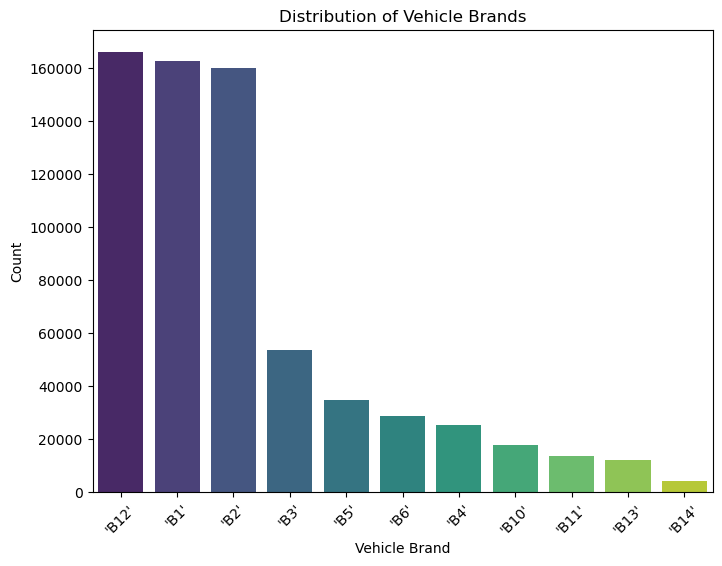

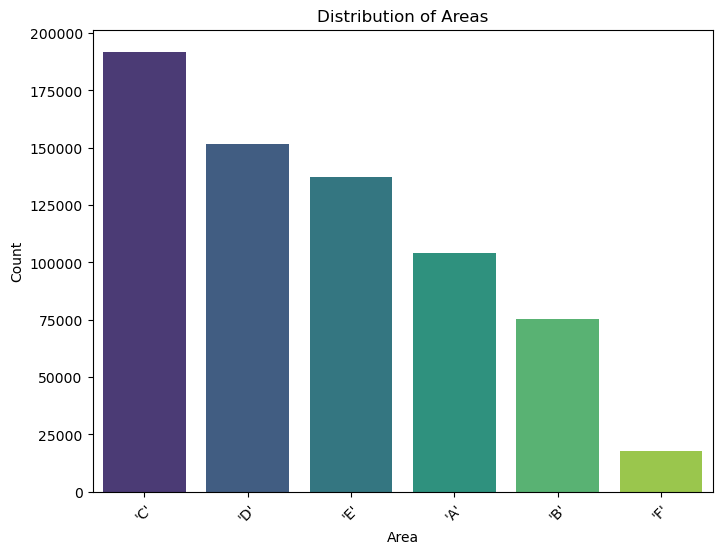

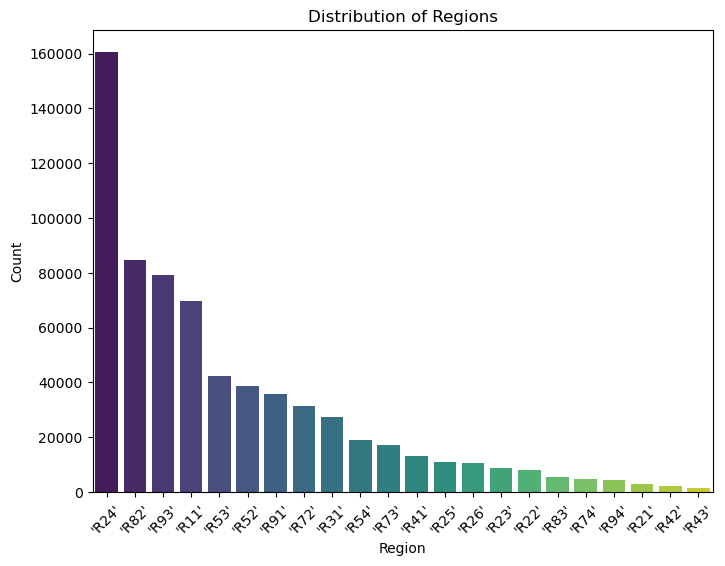

In [28]:
vehbrand_order = aggregated_data['VehBrand'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(x='VehBrand', data=aggregated_data, palette='viridis', order=vehbrand_order)
plt.title('Distribution of Vehicle Brands')
plt.xlabel('Vehicle Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Sort the categories by count in descending order for Area
area_order = aggregated_data['Area'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(x='Area', data=aggregated_data, palette='viridis', order=area_order)
plt.title('Distribution of Areas')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

region_order = aggregated_data['Region'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=aggregated_data, palette='viridis', order=region_order)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

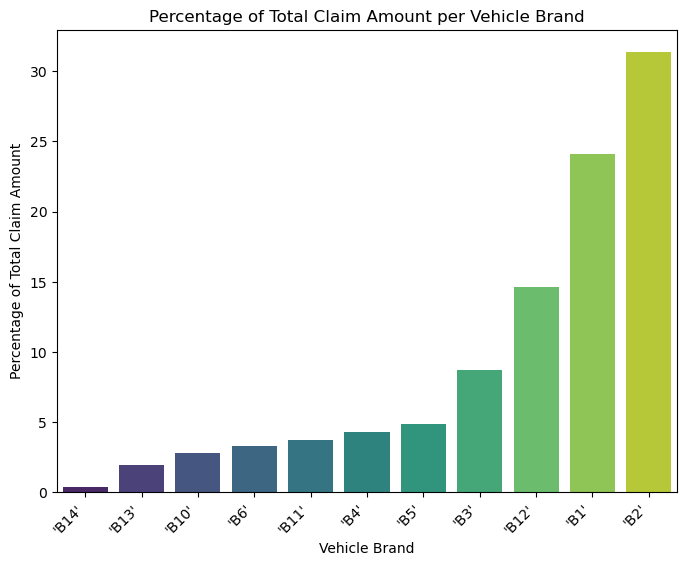

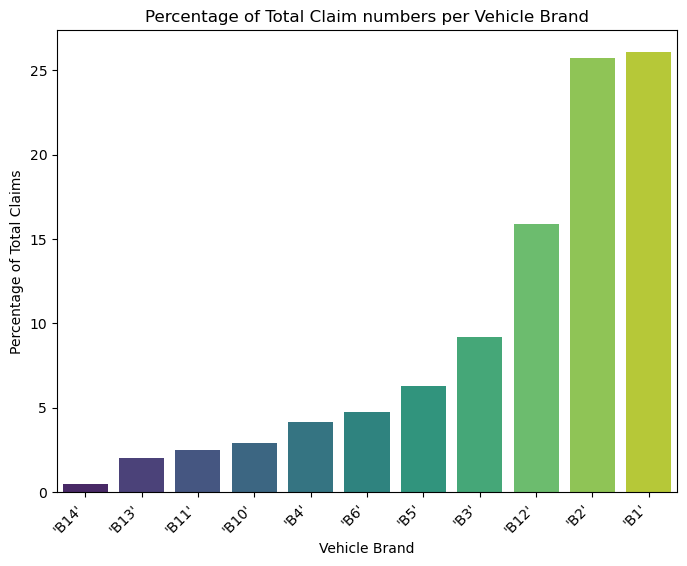

In [29]:
filtered_data = aggregated_data[aggregated_data['ClaimNb'] > 0]

# Group by VehBrand and aggregate the data
brand_claims = filtered_data.groupby('VehBrand').agg(
    total_claim_amount=('ClaimAmount', 'sum'),
    total_claim_nb=('ClaimNb', 'sum')
).reset_index()

# Calculate the total claim amount and percentage
total_claim_amount = brand_claims['total_claim_amount'].sum()
brand_claims['Percentage_ClaimAmount'] = (brand_claims['total_claim_amount'] / total_claim_amount) * 100

# Calculate the total claim number and percentage
total_claim_nb = brand_claims['total_claim_nb'].sum()
brand_claims['Percentage_ClaimNb'] = (brand_claims['total_claim_nb'] / total_claim_nb) * 100

# Sort the data by total claim amount
brand_claims = brand_claims.sort_values(by='total_claim_amount')

# Plot the percentage of total claim amount per vehicle brand
plt.figure(figsize=(8, 6))
sns.barplot(x='VehBrand', y='Percentage_ClaimAmount', data=brand_claims, palette='viridis')
plt.title('Percentage of Total Claim Amount per Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Percentage of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number
brand_claims = brand_claims.sort_values(by='total_claim_nb')

# Plot the percentage of total claims per vehicle brand
plt.figure(figsize=(8, 6))
sns.barplot(x='VehBrand', y='Percentage_ClaimNb', data=brand_claims, palette='viridis')
plt.title('Percentage of Total Claim numbers per Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Percentage of Total Claims')
plt.xticks(rotation=45, ha='right')
plt.show()


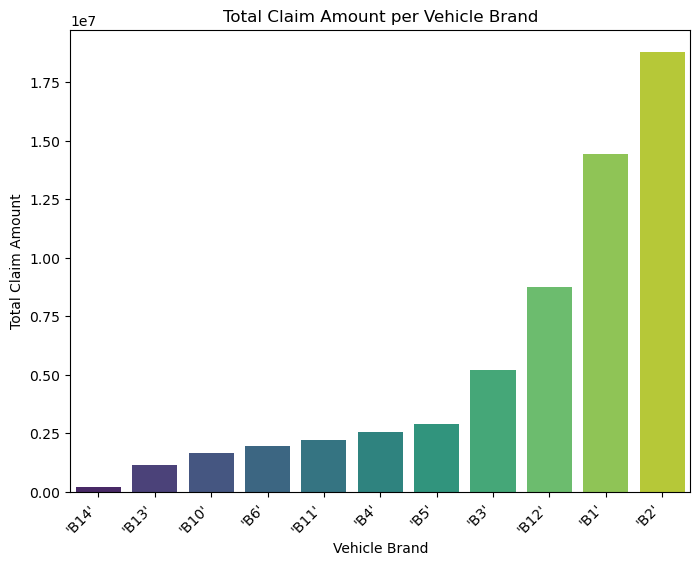

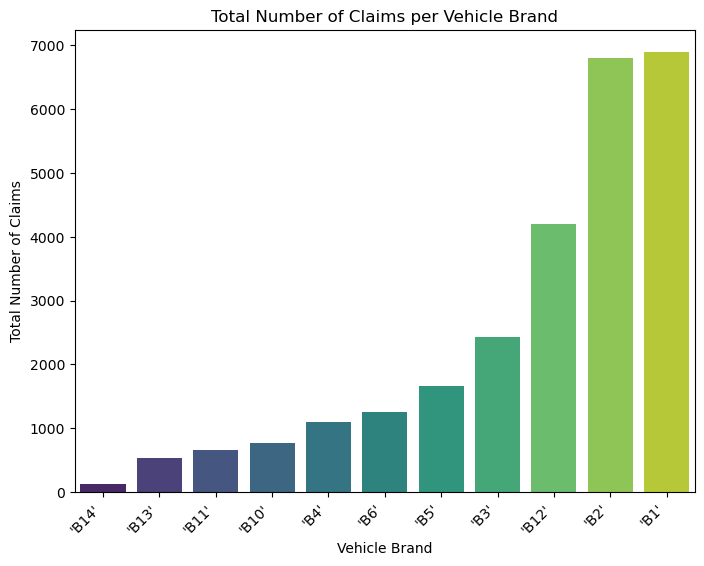

In [30]:
brand_claims = brand_claims.sort_values(by='total_claim_amount', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='VehBrand', y='total_claim_amount', data=brand_claims, palette='viridis')
plt.title('Total Claim Amount per Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number in ascending order
brand_claims = brand_claims.sort_values(by='total_claim_nb', ascending=True)

# Plot the total number of claims per vehicle brand
plt.figure(figsize=(8, 6))
sns.barplot(x='VehBrand', y='total_claim_nb', data=brand_claims, palette='viridis')
plt.title('Total Number of Claims per Vehicle Brand')
plt.xlabel('Vehicle Brand')
plt.ylabel('Total Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Log scale 

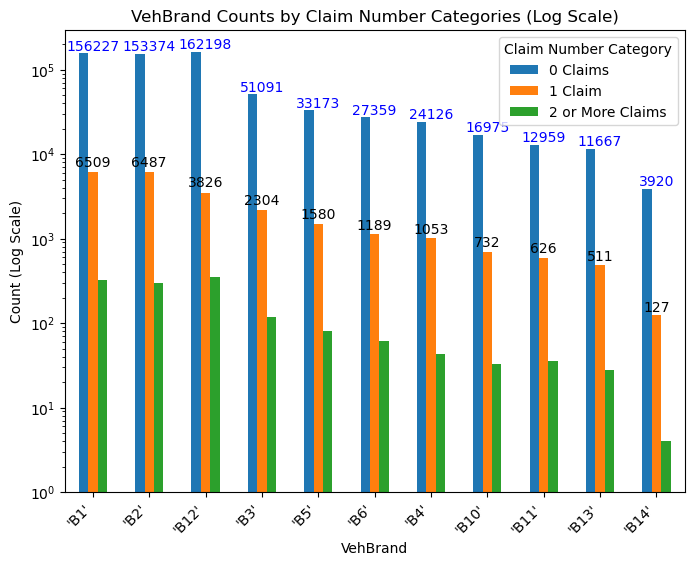

In [31]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

grouped_data = filtered_data.groupby(['ClaimNbCategory', 'VehBrand']).size().reset_index(name='Count')

pivot_data = grouped_data.pivot(index='VehBrand', columns='ClaimNbCategory', values='Count').fillna(0)

pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the pivot_data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

ax = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6), log=True)
plt.title('VehBrand Counts by Claim Number Categories (Log Scale)')
plt.xlabel('VehBrand')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

plt.xticks(rotation=45, ha='right')

for i, total in enumerate(pivot_data['Total Claims']):
    ax.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

for i, value in enumerate(pivot_data['0 Claims']):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='blue', rotation=0)

plt.show()

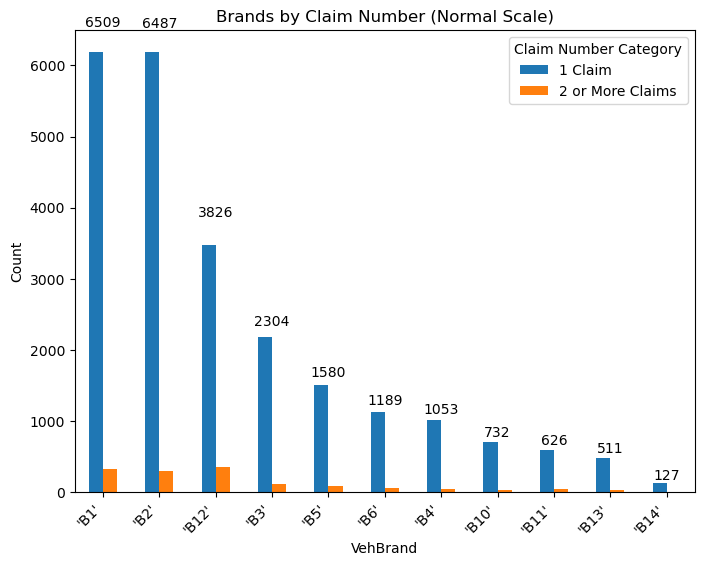

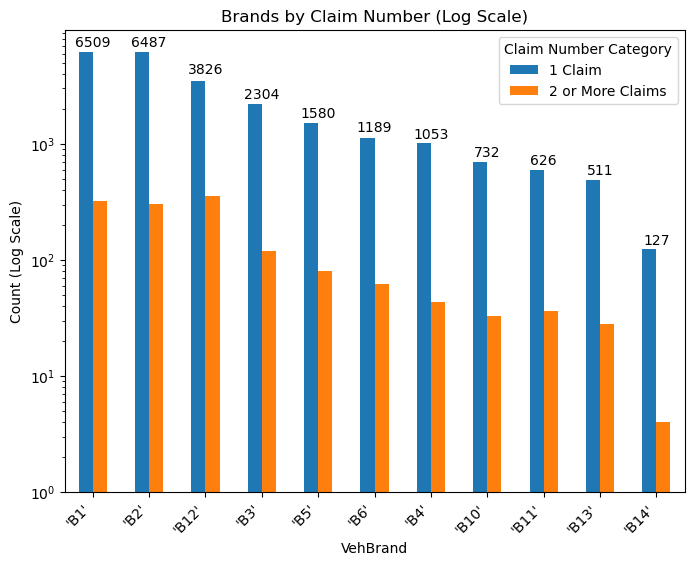

In [32]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and VehBrand
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'VehBrand']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='VehBrand', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per VehBrand
pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

# Plot the results with a normal scale
ax_normal = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6))
plt.title('Brands by Claim Number (Normal Scale)')
plt.xlabel('VehBrand')
plt.ylabel('Count')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each VehBrand
for i, total in enumerate(pivot_data['Total Claims']):
    ax_normal.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

# Plot the results with a logarithmic scale
ax_log = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6), log=True)
plt.title('Brands by Claim Number (Log Scale)')
plt.xlabel('VehBrand')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each VehBrand
for i, total in enumerate(pivot_data['Total Claims']):
    ax_log.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

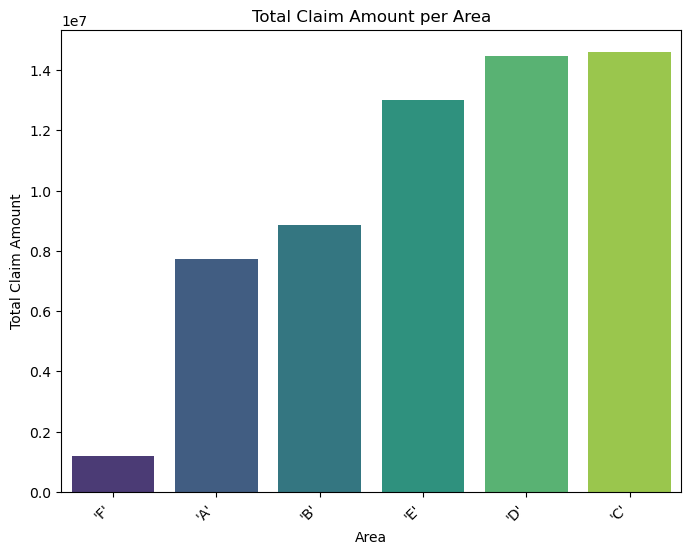

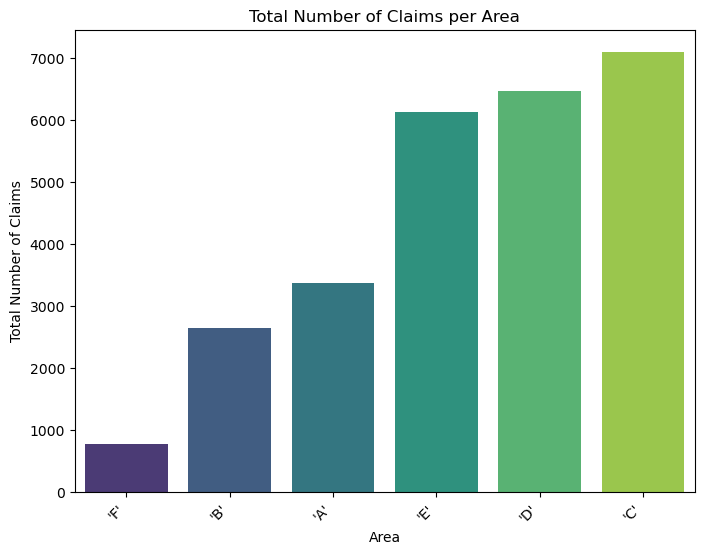

In [33]:
area_claims = filtered_data.groupby('Area').agg(
    total_claim_amount=('ClaimAmount', 'sum'),
    total_claim_nb=('ClaimNb', 'sum')
).reset_index()

# Sort the data by total claim amount
area_claims = area_claims.sort_values(by='total_claim_amount')

# Plot the total claim amount per area with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='total_claim_amount', data=area_claims, palette='viridis')
plt.title('Total Claim Amount per Area')
plt.xlabel('Area')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number
area_claims = area_claims.sort_values(by='total_claim_nb')

# Plot the total number of claims per area with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='total_claim_nb', data=area_claims, palette='viridis')
plt.title('Total Number of Claims per Area')
plt.xlabel('Area')
plt.ylabel('Total Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
area_claims["total_claim_amount"].sum()

59909216.5

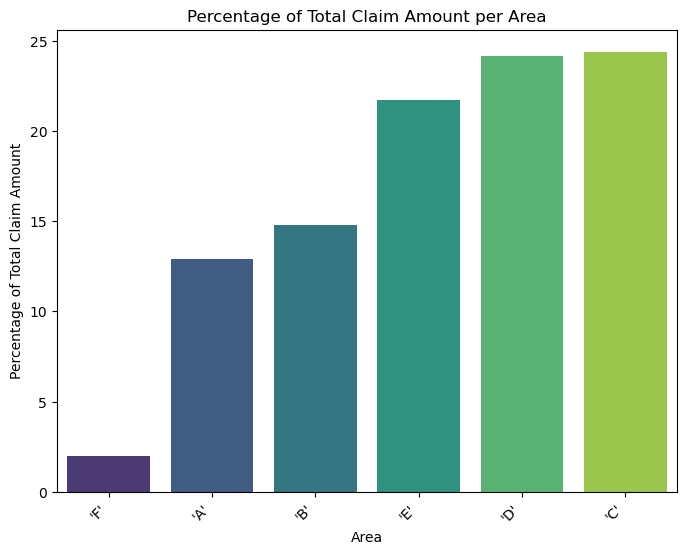

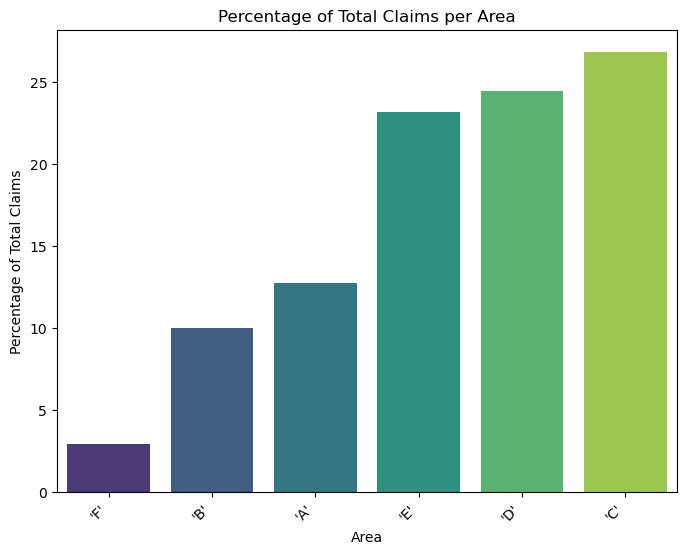

In [35]:
total_claim_amount = area_claims['total_claim_amount'].sum()
area_claims['Percentage_ClaimAmount'] = (area_claims['total_claim_amount'] / total_claim_amount) * 100

# Calculate the total claim number and percentage
total_claim_nb = area_claims['total_claim_nb'].sum()
area_claims['Percentage_ClaimNb'] = (area_claims['total_claim_nb'] / total_claim_nb) * 100

# Sort the data by total claim amount
area_claims = area_claims.sort_values(by='total_claim_amount')

# Plot the percentage of total claim amount per area with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='Percentage_ClaimAmount', data=area_claims, palette='viridis')
plt.title('Percentage of Total Claim Amount per Area')
plt.xlabel('Area')
plt.ylabel('Percentage of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number
area_claims = area_claims.sort_values(by='total_claim_nb')

# Plot the percentage of total claims per area with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='Percentage_ClaimNb', data=area_claims, palette='viridis')
plt.title('Percentage of Total Claims per Area')
plt.xlabel('Area')
plt.ylabel('Percentage of Total Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

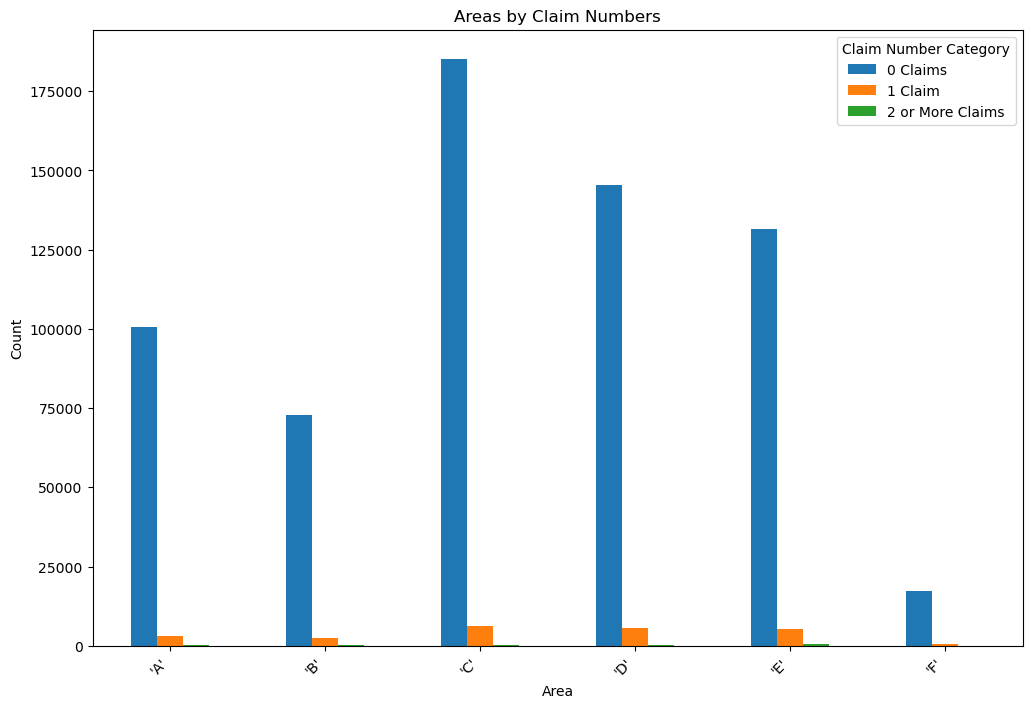

In [36]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    else:
        return '2 or More Claims'


aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)
grouped_data = aggregated_data.groupby(['ClaimNbCategory', 'Area']).size().reset_index(name='Count')
pivot_data = grouped_data.pivot(index='Area', columns='ClaimNbCategory', values='Count').fillna(0)

ax = pivot_data.plot(kind='bar', figsize=(12, 8))
plt.title('Areas by Claim Numbers')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

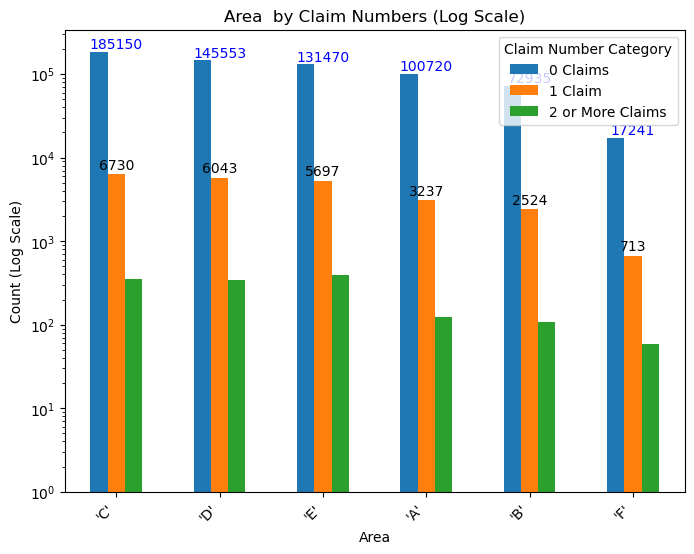

In [37]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

grouped_data = filtered_data.groupby(['ClaimNbCategory', 'Area']).size().reset_index(name='Count')

pivot_data = grouped_data.pivot(index='Area', columns='ClaimNbCategory', values='Count').fillna(0)

pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the pivot_data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

ax = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6), log=True)
plt.title('Area  by Claim Numbers (Log Scale)')
plt.xlabel('Area')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

plt.xticks(rotation=45, ha='right')

for i, total in enumerate(pivot_data['Total Claims']):
    ax.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

# Annotate the values on top of the highest blue bar (0 Claims)
for i, value in enumerate(pivot_data['0 Claims']):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='blue', rotation=0)

plt.show()

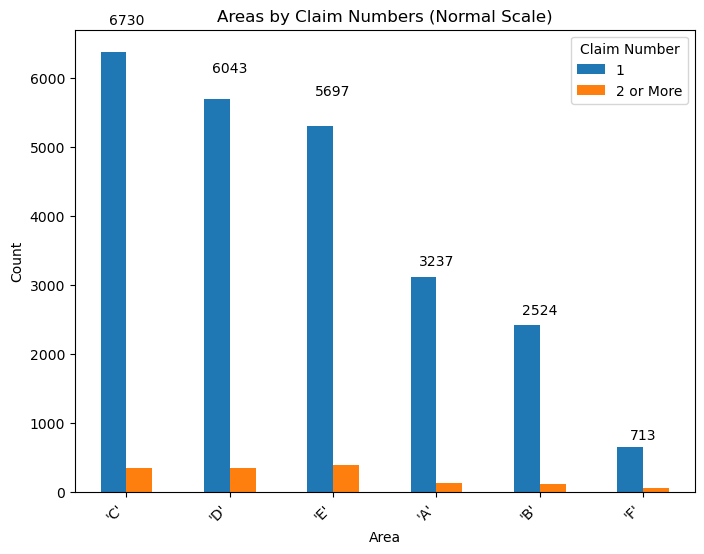

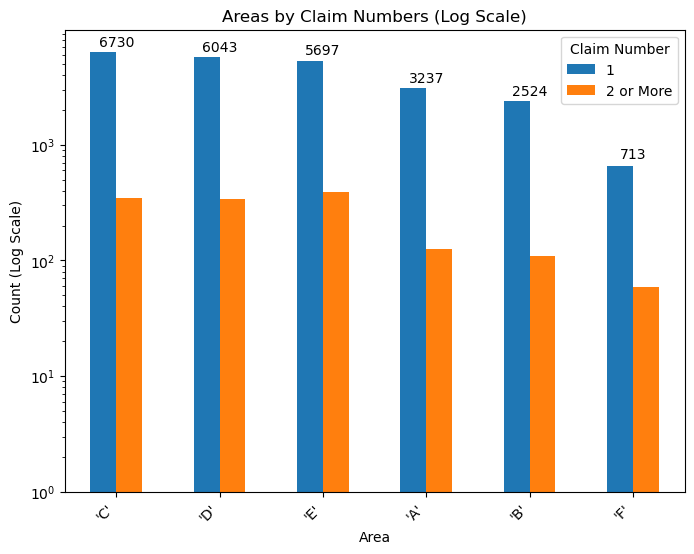

In [38]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 1:
        return '1'
    elif claim_nb >= 2:
        return '2 or More'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and Area
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'Area']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Area', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per Area
pivot_data['Total Claims'] = pivot_data[['1', '2 or More']].sum(axis=1)

# Sort the data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

# Plot the results with a normal scale
ax_normal = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6))
plt.title('Areas by Claim Numbers (Normal Scale)')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Claim Number')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Area
for i, total in enumerate(pivot_data['Total Claims']):
    ax_normal.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

# Plot the results with a logarithmic scale
ax_log = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(8, 6), log=True)
plt.title('Areas by Claim Numbers (Log Scale)')
plt.xlabel('Area')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Area
for i, total in enumerate(pivot_data['Total Claims']):
    ax_log.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

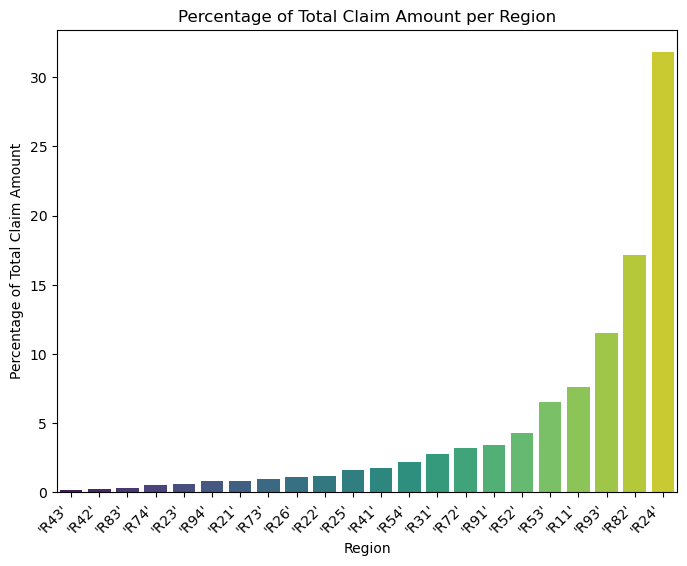

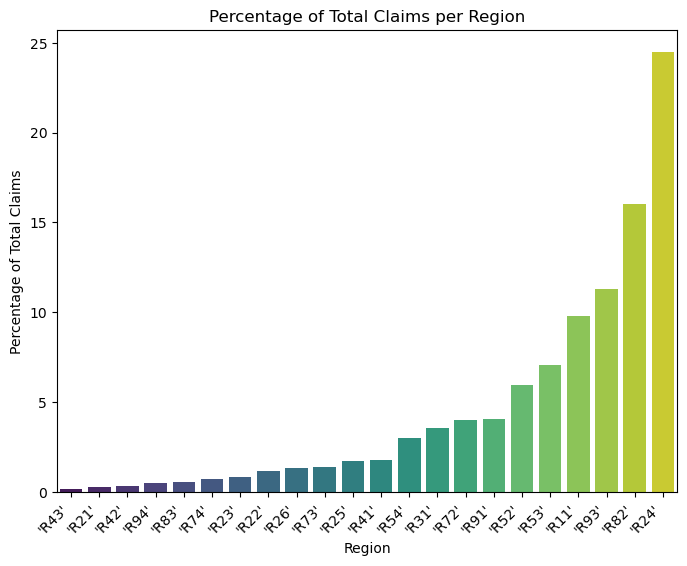

In [39]:
region_claims = filtered_data.groupby('Region').agg(
    total_claim_amount=('ClaimAmount', 'sum'),
    total_claim_nb=('ClaimNb', 'sum')
).reset_index()

# Calculate the total claim amount and percentage
total_claim_amount = region_claims['total_claim_amount'].sum()
region_claims['Percentage_ClaimAmount'] = (region_claims['total_claim_amount'] / total_claim_amount) * 100

# Calculate the total claim number and percentage
total_claim_nb = region_claims['total_claim_nb'].sum()
region_claims['Percentage_ClaimNb'] = (region_claims['total_claim_nb'] / total_claim_nb) * 100

# Sort the data by percentage of total claim amount
region_claims = region_claims.sort_values(by='Percentage_ClaimAmount')

# Plot the percentage of total claim amount per region with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Percentage_ClaimAmount', data=region_claims, palette='viridis')
plt.title('Percentage of Total Claim Amount per Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by percentage of total claim number
region_claims = region_claims.sort_values(by='Percentage_ClaimNb')

# Plot the percentage of total claims per region with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Percentage_ClaimNb', data=region_claims, palette='viridis')
plt.title('Percentage of Total Claims per Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Total Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
region_claims.head()

,Region,total_claim_amount,total_claim_nb,Percentage_ClaimAmount,Percentage_ClaimNb
10,'R43',76534.11,38,0.127750,0.143700
1,'R21',481248.34,77,0.803296,0.291181
9,'R42',121424.99,92,0.202682,0.347905
21,'R94',464582.55,132,0.775478,0.499168
18,'R83',183974.83,141,0.307089,0.533202


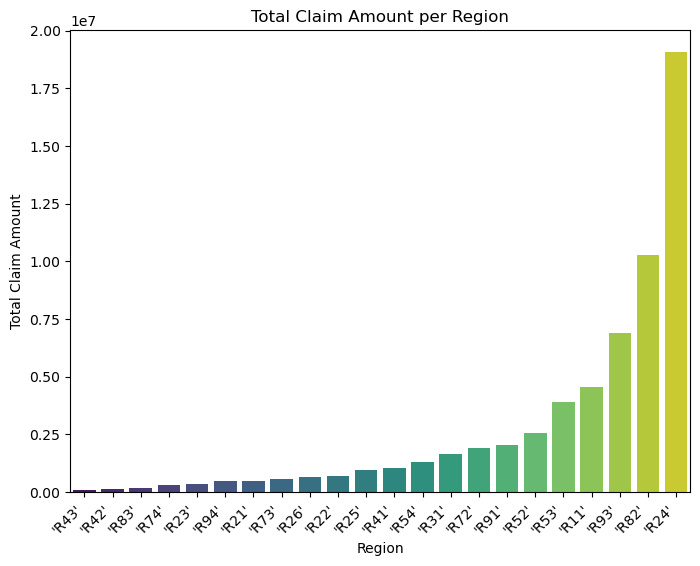

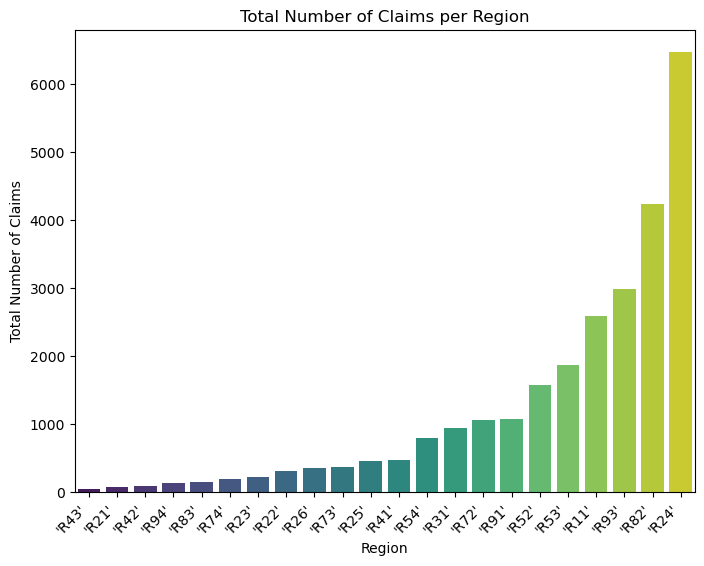

In [41]:
region_claims = region_claims.sort_values(by='total_claim_amount')

# Plot the total claim amount per region with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='total_claim_amount', data=region_claims, palette='viridis')
plt.title('Total Claim Amount per Region')
plt.xlabel('Region')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort the data by total claim number
region_claims = region_claims.sort_values(by='total_claim_nb')

# Plot the total number of claims per region with vertical bars
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='total_claim_nb', data=region_claims, palette='viridis')
plt.title('Total Number of Claims per Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

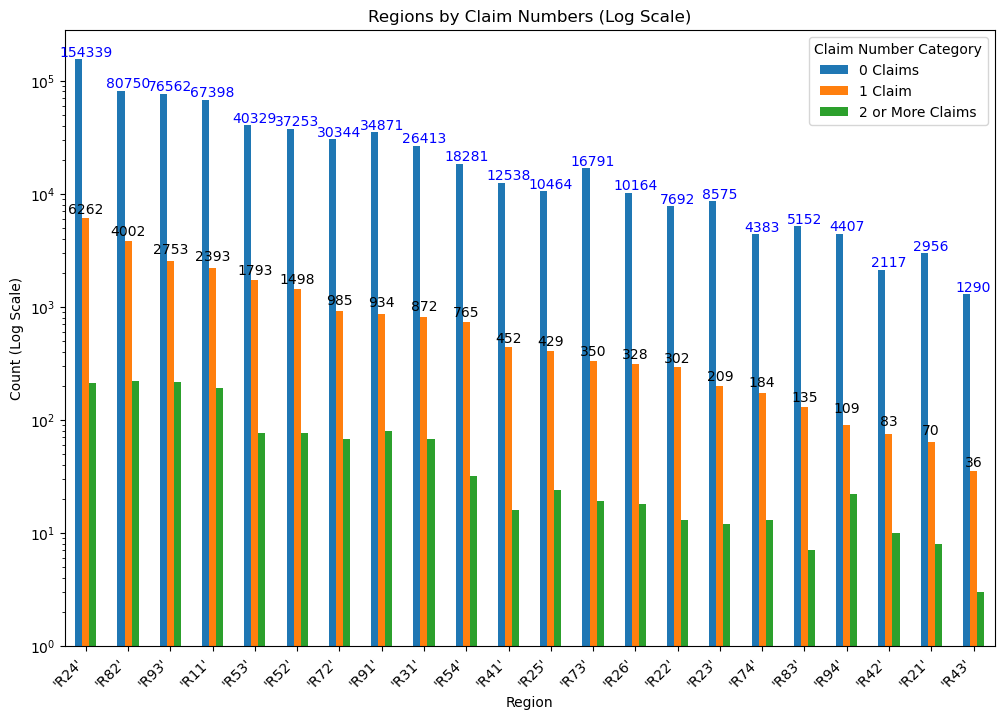

In [42]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and Region
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'Region']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Region', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per Region
pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

# Plot the results with a logarithmic scale
ax = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(12, 8), log=True)
plt.title('Regions by Claim Numbers (Log Scale)')
plt.xlabel('Region')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Region
for i, total in enumerate(pivot_data['Total Claims']):
    ax.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

# Annotate the values on top of the highest blue bar (0 Claims)
for i, value in enumerate(pivot_data['0 Claims']):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='blue', rotation=0)

plt.show()

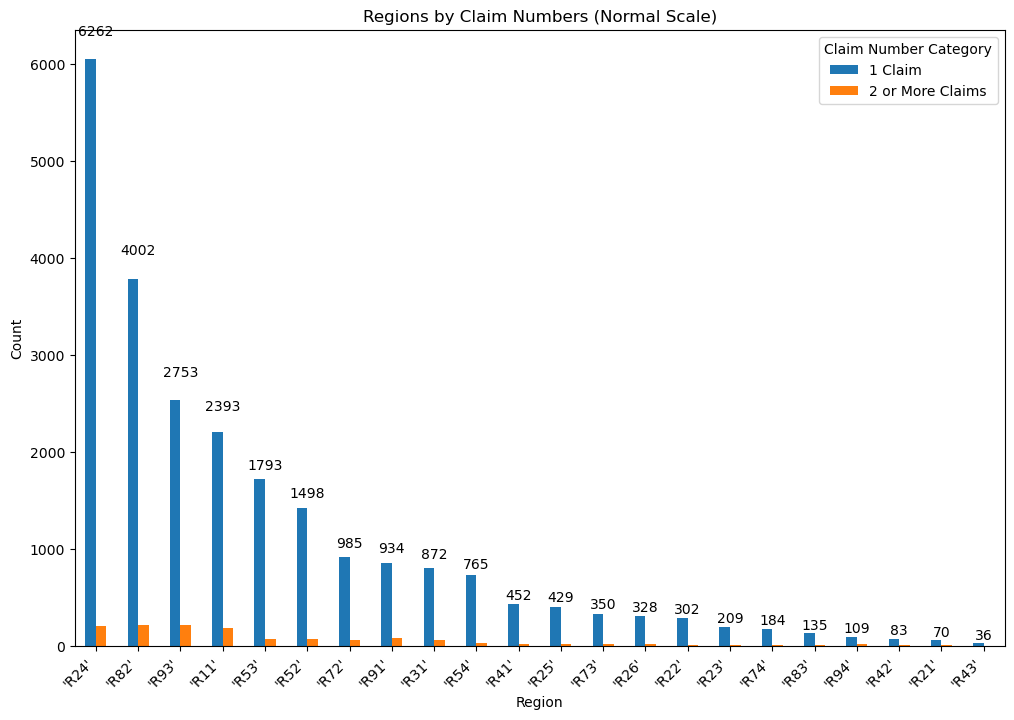

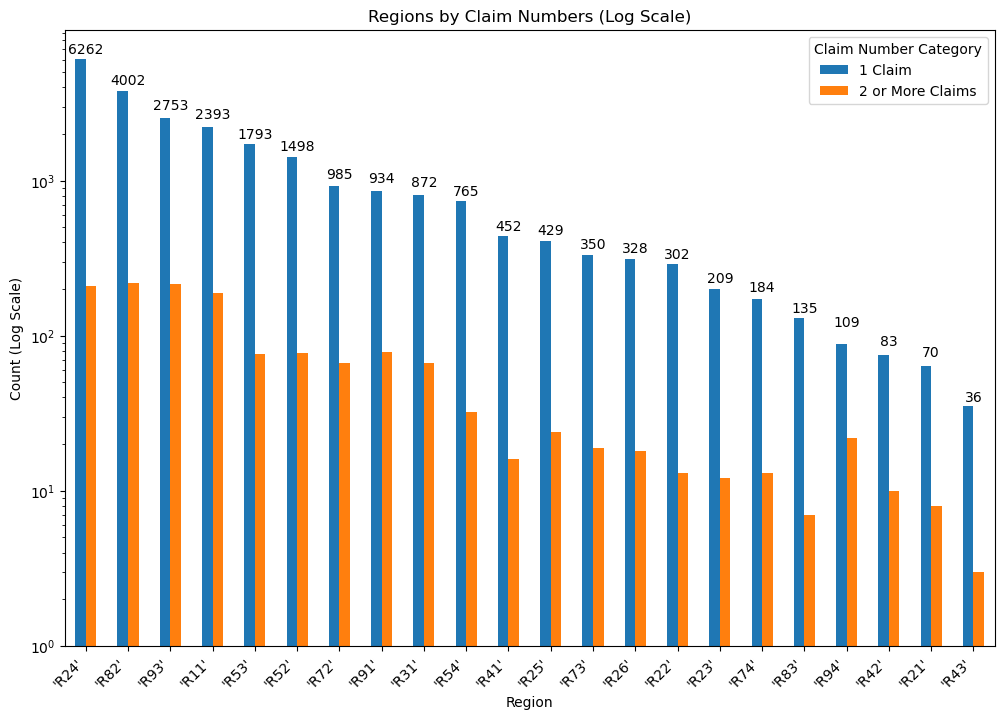

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'aggregated_data'

# Step 1: Create a new column for ClaimNb categories
def categorize_claim_nb(claim_nb):
    if claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and Region
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'Region']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Region', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per Region
pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Sort the data by Total Claims in descending order
pivot_data = pivot_data.sort_values(by='Total Claims', ascending=False)

# Plot the results with a normal scale
ax_normal = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(12, 8))
plt.title('Regions by Claim Numbers (Normal Scale)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Region
for i, total in enumerate(pivot_data['Total Claims']):
    ax_normal.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

# Plot the results with a logarithmic scale
ax_log = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(12, 8), log=True)
plt.title('Regions by Claim Numbers (Log Scale)')
plt.xlabel('Region')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each Region
for i, total in enumerate(pivot_data['Total Claims']):
    ax_log.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.show()

In [44]:
region_claims.head()

,Region,total_claim_amount,total_claim_nb,Percentage_ClaimAmount,Percentage_ClaimNb
10,'R43',76534.11,38,0.127750,0.143700
1,'R21',481248.34,77,0.803296,0.291181
9,'R42',121424.99,92,0.202682,0.347905
21,'R94',464582.55,132,0.775478,0.499168
18,'R83',183974.83,141,0.307089,0.533202


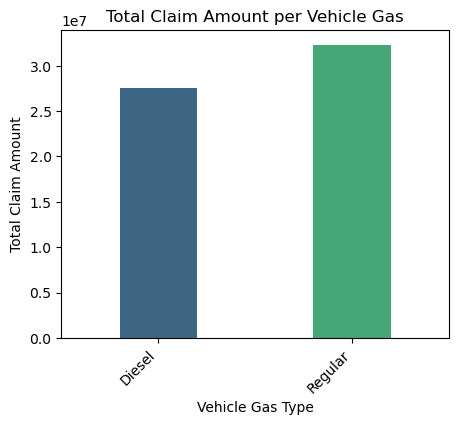

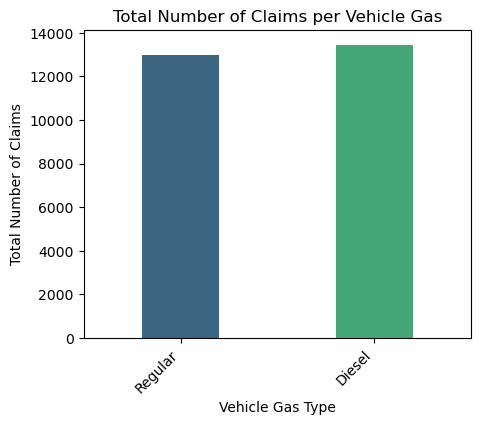

In [45]:
filtered_data = aggregated_data[aggregated_data['ClaimNb'] > 0]
vehgas_claims = filtered_data.groupby('VehGas').agg(
    total_claim_amount=('ClaimAmount', 'sum'),
    total_claim_nb=('ClaimNb', 'sum')
).reset_index()

# Sort by total claim amount
vehgas_claims = vehgas_claims.sort_values(by='total_claim_amount')

# Plot the total claim amount as a bar graph with vertical bars
plt.figure(figsize=(5, 4))
sns.barplot(x='VehGas', y='total_claim_amount', data=vehgas_claims, palette='viridis', width=0.4)
plt.title('Total Claim Amount per Vehicle Gas')
plt.xlabel('Vehicle Gas Type')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort by total claim number
vehgas_claims = vehgas_claims.sort_values(by='total_claim_nb')

# Plot the total count of claims as a bar graph with vertical bars
plt.figure(figsize=(5, 4))
sns.barplot(x='VehGas', y='total_claim_nb', data=vehgas_claims, palette='viridis', width=0.4)
plt.title('Total Number of Claims per Vehicle Gas')
plt.xlabel('Vehicle Gas Type')
plt.ylabel('Total Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

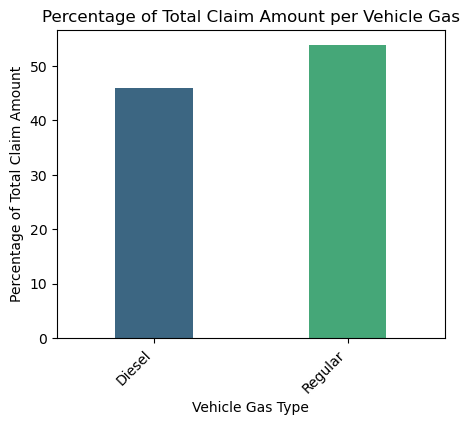

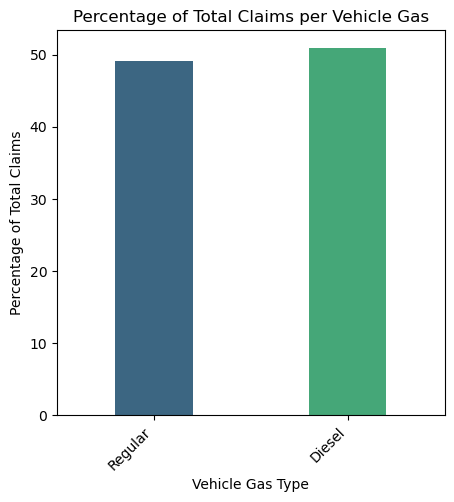

In [46]:
total_claim_amount = vehgas_claims['total_claim_amount'].sum()
vehgas_claims['Percentage_ClaimAmount'] = (vehgas_claims['total_claim_amount'] / total_claim_amount) * 100

# Calculate the total claim number and percentage
total_claim_nb = vehgas_claims['total_claim_nb'].sum()
vehgas_claims['Percentage_ClaimNb'] = (vehgas_claims['total_claim_nb'] / total_claim_nb) * 100

# Sort by percentage of total claim amount
vehgas_claims = vehgas_claims.sort_values(by='Percentage_ClaimAmount')

# Plot the percentage of total claim amount as a bar graph with vertical bars
plt.figure(figsize=(5, 4))
sns.barplot(x='VehGas', y='Percentage_ClaimAmount', data=vehgas_claims, palette='viridis', width=0.4)
plt.title('Percentage of Total Claim Amount per Vehicle Gas')
plt.xlabel('Vehicle Gas Type')
plt.ylabel('Percentage of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sort by percentage of total claim number
vehgas_claims = vehgas_claims.sort_values(by='Percentage_ClaimNb')

# Plot the percentage of total claims as a bar graph with vertical bars
plt.figure(figsize=(5, 5))
sns.barplot(x='VehGas', y='Percentage_ClaimNb', data=vehgas_claims, palette='viridis', width=0.4)
plt.title('Percentage of Total Claims per Vehicle Gas')
plt.xlabel('Vehicle Gas Type')
plt.ylabel('Percentage of Total Claims')
plt.xticks(rotation=45, ha='right')
plt.show()

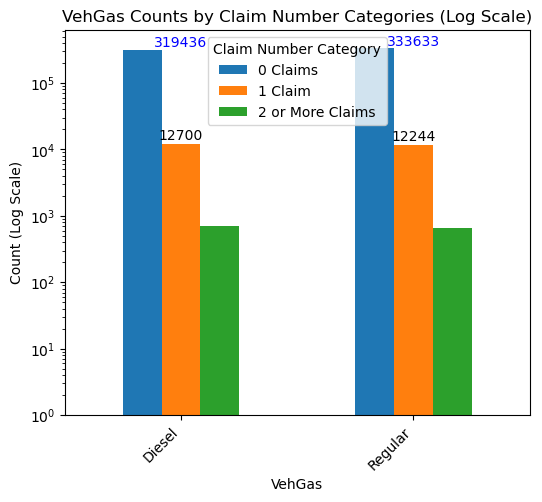

In [47]:
def categorize_claim_nb(claim_nb):
    if claim_nb == 0:
        return '0 Claims'
    elif claim_nb == 1:
        return '1 Claim'
    elif claim_nb >= 2:
        return '2 or More Claims'
    else:
        return None

# Apply the categorization function
aggregated_data['ClaimNbCategory'] = aggregated_data['ClaimNb'].apply(categorize_claim_nb)

# Filter out rows where ClaimNbCategory is None
filtered_data = aggregated_data[aggregated_data['ClaimNbCategory'].notnull()]

# Group by the new category and VehGas
grouped_data = filtered_data.groupby(['ClaimNbCategory', 'VehGas']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='VehGas', columns='ClaimNbCategory', values='Count').fillna(0)

# Calculate total claims per VehGas excluding '0 Claims'
pivot_data['Total Claims'] = pivot_data[['1 Claim', '2 or More Claims']].sum(axis=1)

# Plot the results with a logarithmic scale
ax = pivot_data.drop(columns='Total Claims').plot(kind='bar', figsize=(6, 5), log=True)
plt.title('VehGas Counts by Claim Number Categories (Log Scale)')
plt.xlabel('VehGas')
plt.ylabel('Count (Log Scale)')
plt.legend(title='Claim Number Category')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Annotate total claims for each VehGas
for i, total in enumerate(pivot_data['Total Claims']):
    ax.text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=10, color='black', rotation=0)

# Annotate the values on top of the highest blue bar (0 Claims)
for i, value in enumerate(pivot_data['0 Claims']):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='blue', rotation=0)

plt.show()

In [48]:
vehgas_claims.head()

,VehGas,total_claim_amount,total_claim_nb,Percentage_ClaimAmount,Percentage_ClaimNb
1,Regular,32314542.55,12994,53.939184,49.137801
0,Diesel,27594673.95,13450,46.060816,50.862199


In [49]:
aggregated_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDpol            678013 non-null  float64
 1   ClaimAmount      678013 non-null  float64
 2   ClaimNb          678013 non-null  int64  
 3   Exposure         678013 non-null  float64
 4   Area             678013 non-null  object 
 5   VehPower         678013 non-null  float64
 6   VehAge           678013 non-null  float64
 7   DrivAge          678013 non-null  float64
 8   BonusMalus       678013 non-null  float64
 9   VehBrand         678013 non-null  object 
 10  VehGas           678013 non-null  object 
 11  Density          678013 non-null  float64
 12  Region           678013 non-null  object 
 13  ClaimNbCategory  678013 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 72.4+ MB


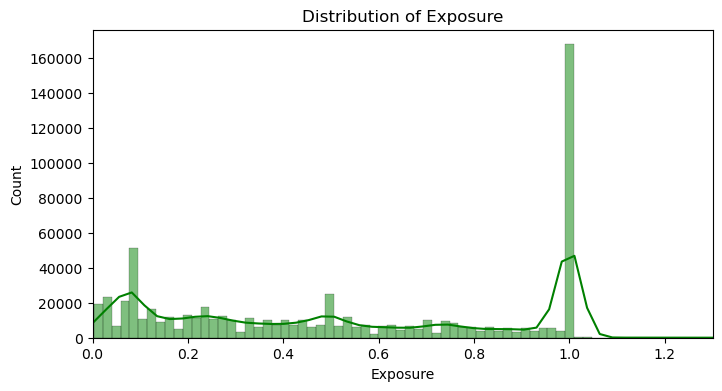

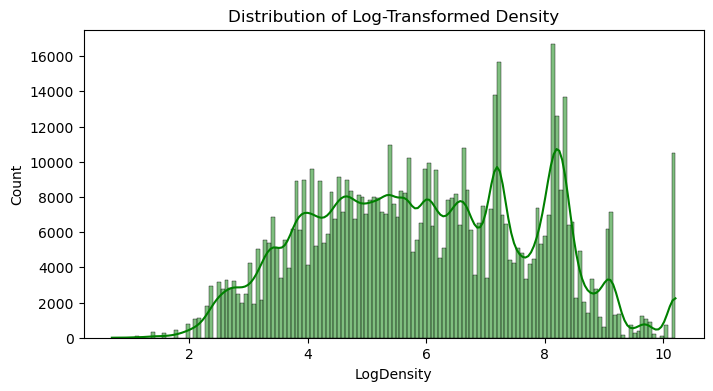

In [51]:
import numpy as np
numerical_columns = ['Exposure', 'Density']

# Apply log transformation to the Density column
aggregated_data['LogDensity'] = np.log(aggregated_data['Density'] + 1)  # Adding 1 to avoid log(0)

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    
    if column == 'Density':
        sns.histplot(data=aggregated_data, x='LogDensity', kde=True, color='green')
        plt.title('Distribution of Log-Transformed Density')
        plt.xlabel('LogDensity')
    else:
        sns.histplot(data=aggregated_data, x=column, kde=True, color='green')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
    
    plt.ylabel('Count')
    
    if column == 'Exposure':
        plt.xlim(0, 1.3)
    
    plt.show()

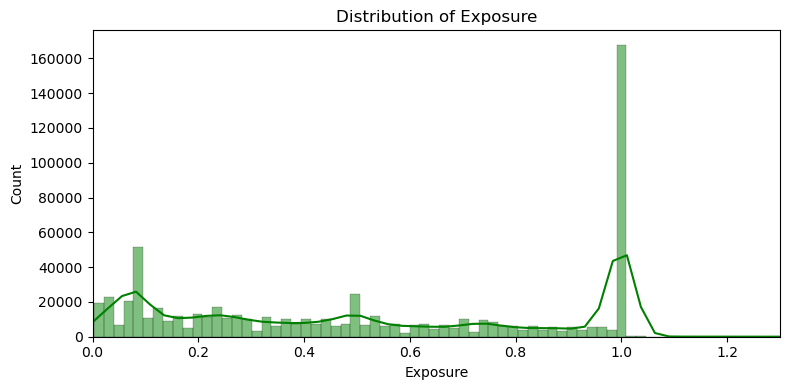

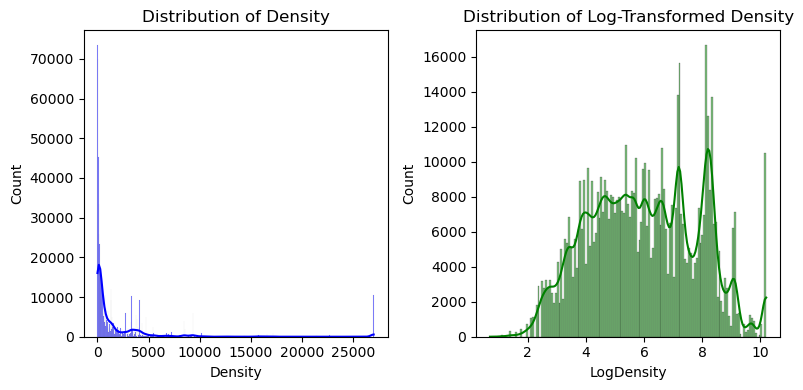

In [52]:
numerical_columns = ['Exposure', 'Density']

# Apply log transformation to the Density column
aggregated_data['LogDensity'] = np.log(aggregated_data['Density'] + 1)  # Adding 1 to avoid log(0)

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    
    if column == 'Density':
        # Plot the normal Density
        plt.subplot(1, 2, 1)
        sns.histplot(data=aggregated_data, x=column, kde=True, color='blue')
        plt.title('Distribution of Density')
        plt.xlabel('Density')
        plt.ylabel('Count')
        
        # Plot the log-transformed Density
        plt.subplot(1, 2, 2)
        sns.histplot(data=aggregated_data, x='LogDensity', kde=True, color='green')
        plt.title('Distribution of Log-Transformed Density')
        plt.xlabel('LogDensity')
        plt.ylabel('Count')
    else:
        sns.histplot(data=aggregated_data, x=column, kde=True, color='green')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        if column == 'Exposure':
            plt.xlim(0, 1.3)
    
    plt.tight_layout()
    plt.show()

In [53]:
aggregated_data["LogDensity"].unique()

array([7.10496545, 4.00733319, 4.34380542, ..., 6.94408721, 6.92165818,
       6.81234509])

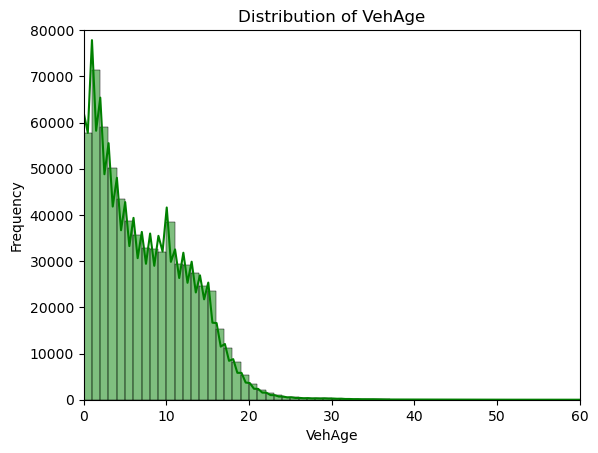

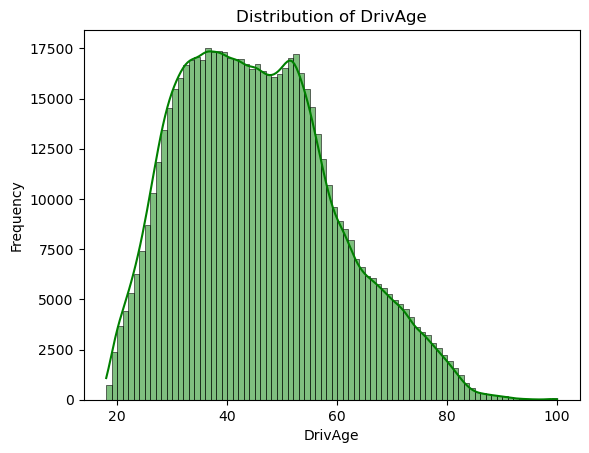

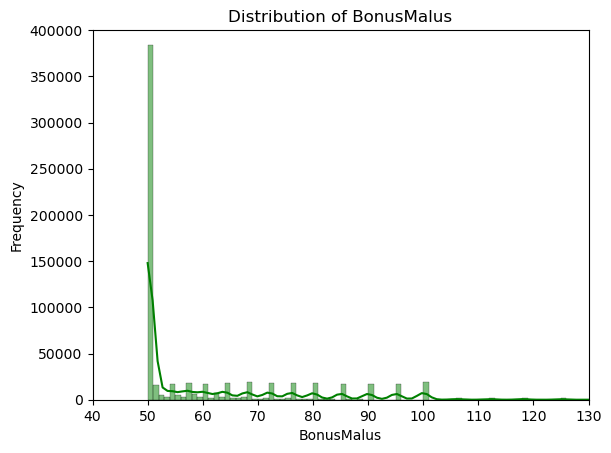

In [54]:
numerical_columns = ['VehAge', 'DrivAge', 'BonusMalus']

for column in numerical_columns:
    sns.histplot(data=aggregated_data, x=column, kde=True, color='green', binwidth=1)  # Adjust binwidth as needed
   

    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
        
    if column == 'VehAge':
        plt.xlim(0, 60)
        plt.ylim(0, 80000)
    
    if column == 'BonusMalus':
        plt.xlim(40, 130)
        plt.ylim(0, 400000)
    
    plt.show()



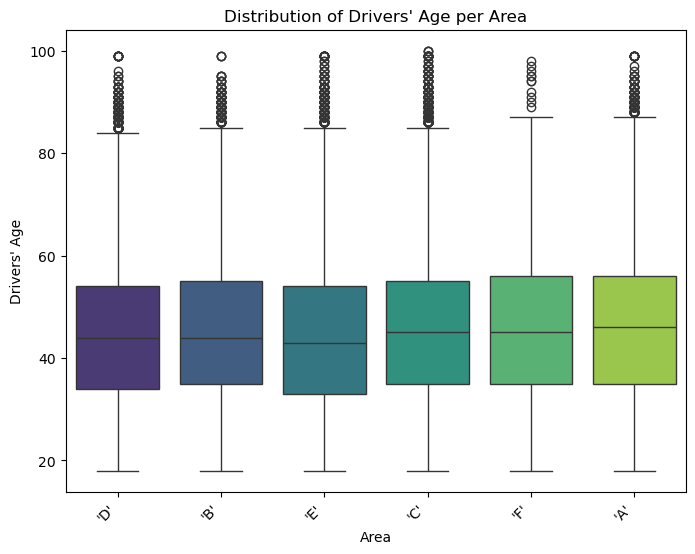

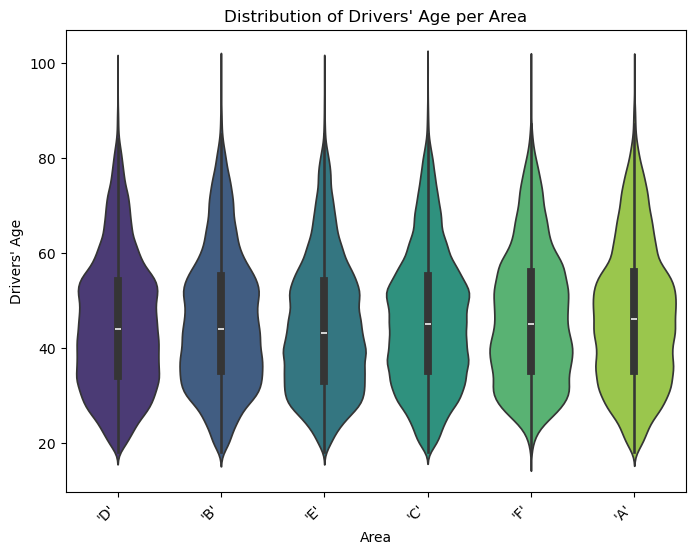

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Area' is the categorical column and 'DrivAge' is the continuous numerical column
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(data=aggregated_data, x='Area', y='DrivAge', palette='viridis')
plt.title('Distribution of Drivers\' Age per Area')
plt.xlabel('Area')
plt.ylabel('Drivers\' Age')
plt.xticks(rotation=45, ha='right')
plt.show()

# Alternatively, you can create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=aggregated_data, x='Area', y='DrivAge', palette='viridis')
plt.title('Distribution of Drivers\' Age per Area')
plt.xlabel('Area')
plt.ylabel('Drivers\' Age')
plt.xticks(rotation=45, ha='right')
plt.show()

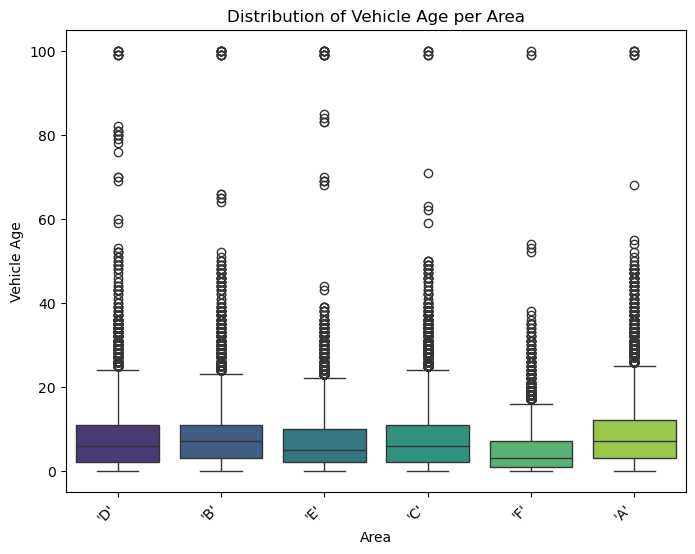

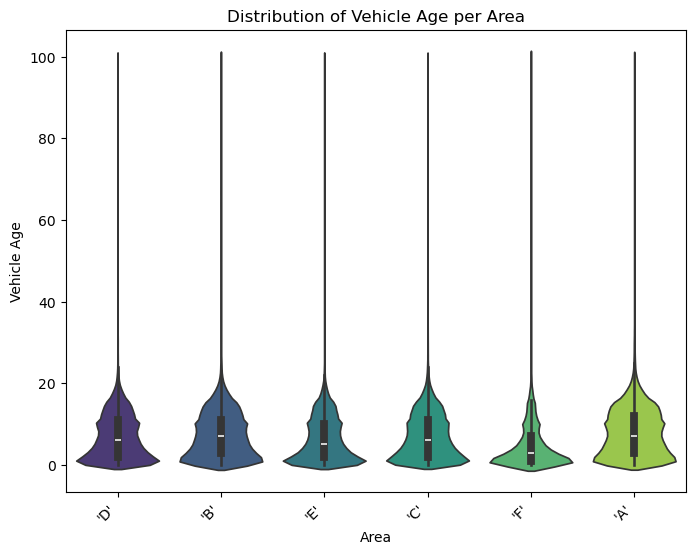

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Area' is the categorical column and 'VehAge' is the continuous numerical column
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(data=aggregated_data, x='Area', y='VehAge', palette='viridis')
plt.title('Distribution of Vehicle Age per Area')
plt.xlabel('Area')
plt.ylabel('Vehicle Age')
plt.xticks(rotation=45, ha='right')
plt.show()

# Alternatively, you can create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=aggregated_data, x='Area', y='VehAge', palette='viridis')
plt.title('Distribution of Vehicle Age per Area')
plt.xlabel('Area')
plt.ylabel('Vehicle Age')
plt.xticks(rotation=45, ha='right')
plt.show()

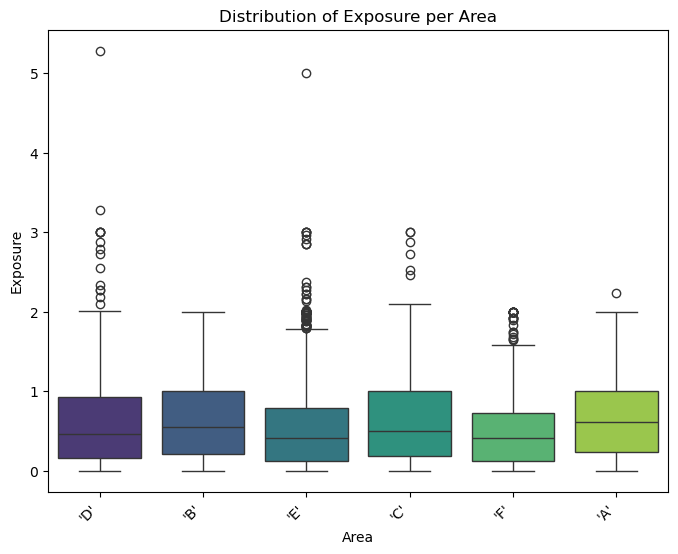

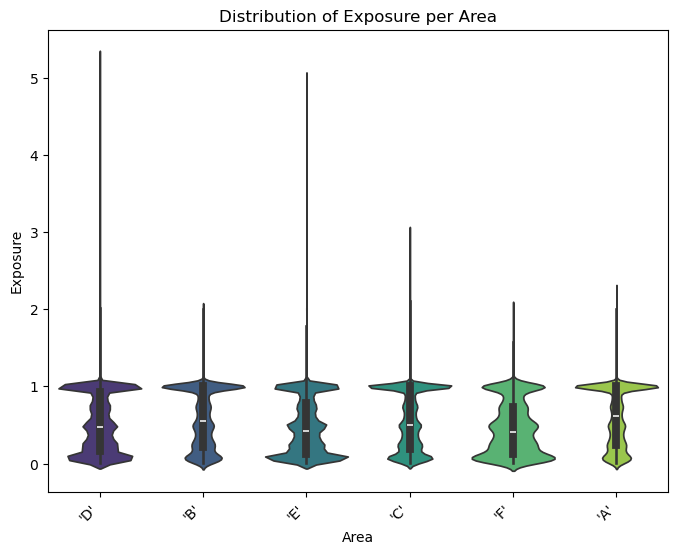

In [57]:
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(data=aggregated_data, x='Area', y='Exposure', palette='viridis')
plt.title('Distribution of Exposure per Area')
plt.xlabel('Area')
plt.ylabel('Exposure')
plt.xticks(rotation=45, ha='right')
plt.show()

# Alternatively, you can create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=aggregated_data, x='Area', y='Exposure', palette='viridis')
plt.title('Distribution of Exposure per Area')
plt.xlabel('Area')
plt.ylabel('Exposure')
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
aggregated_data.Exposure.value_counts().sort_index()

Exposure
0.002732    1060
0.002740    2045
0.005464     609
0.005479    1395
0.008197     620
            ... 
2.970000       1
3.000000      10
3.280000       1
5.000000       1
5.280000       1
Name: count, Length: 228, dtype: int64

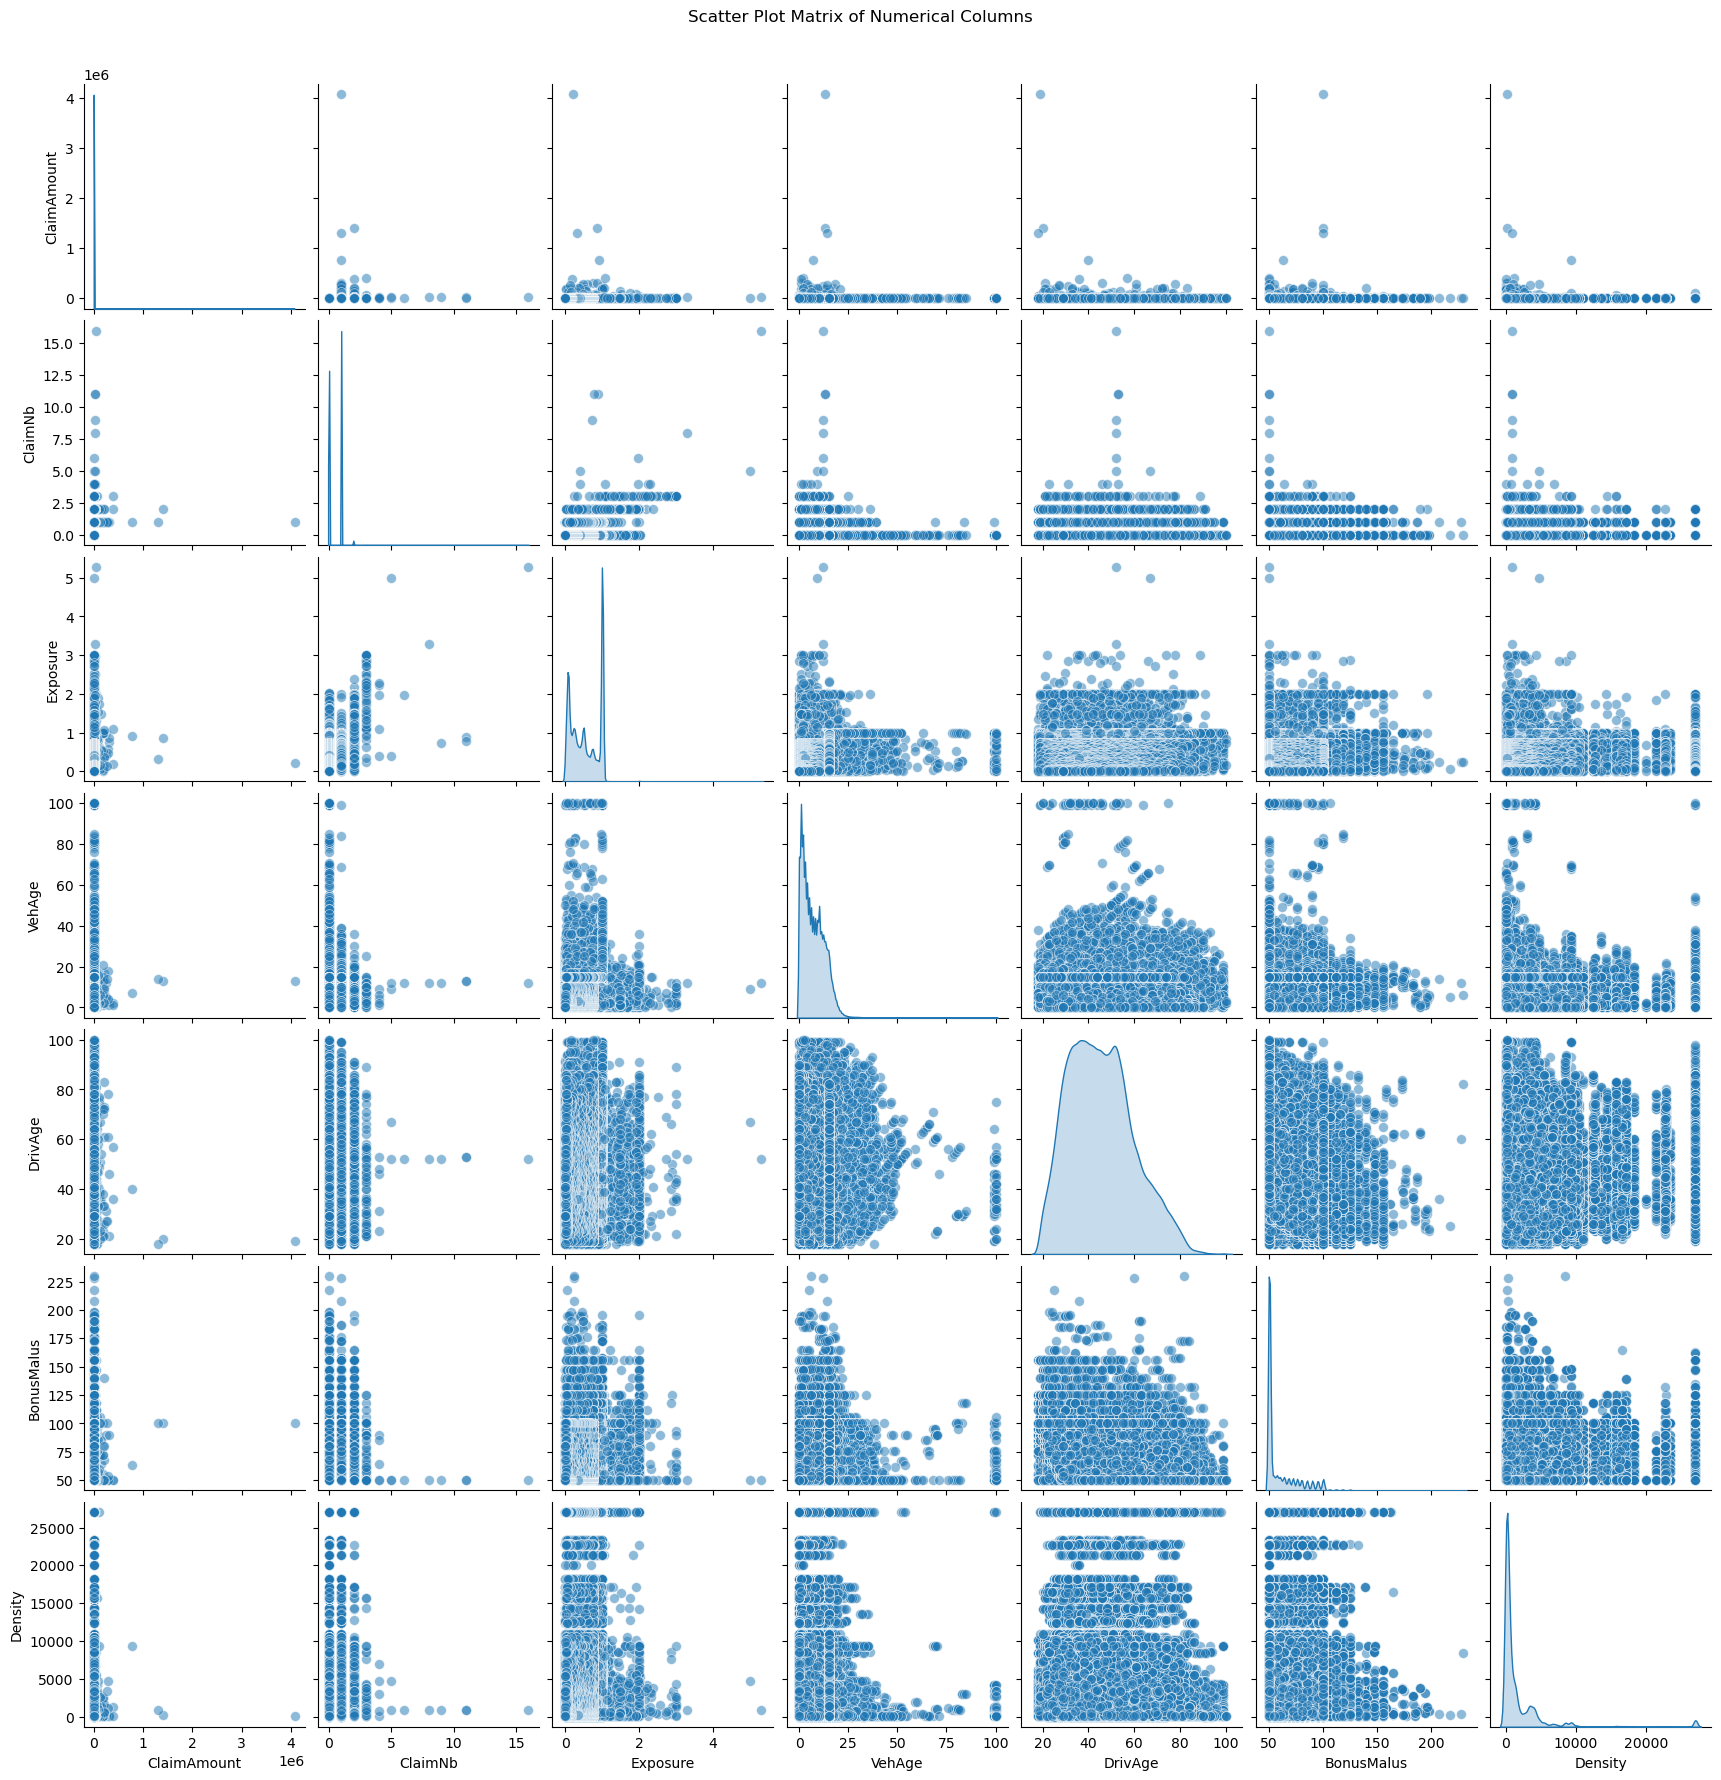

In [59]:
numerical_columns = ['ClaimAmount', 'ClaimNb', 'Exposure', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']
sns.pairplot(aggregated_data[numerical_columns], diag_kind='kde', plot_kws={'alpha':0.5, 's':50})
plt.suptitle('Scatter Plot Matrix of Numerical Columns', y=1.02)
plt.show()

In [60]:
print(aggregated_data.isna().sum())

IDpol              0
ClaimAmount        0
ClaimNb            0
Exposure           0
Area               0
VehPower           0
VehAge             0
DrivAge            0
BonusMalus         0
VehBrand           0
VehGas             0
Density            0
Region             0
ClaimNbCategory    0
LogDensity         0
dtype: int64


In [61]:
aggregated_data['AvgClaimAmountPerExposure'] = aggregated_data['ClaimAmount'] / aggregated_data['Exposure']
aggregated_data['AvgClaimAmountPerExposure'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

##### Creating age groups

In [62]:
bins_vehage = [0, 3, 7, 12,float('inf')] 
labels_vehage = ['New', 'Mid-aged', 'Old', 'Very Old'] 
aggregated_data['VehAgeGroup'] = pd.cut(aggregated_data['VehAge'], bins=bins_vehage, labels=labels_vehage,include_lowest=True)
aggregated_data.head()

bins_drivage = [18, 25, 40, 60, float('inf')]
labels_drivage = ['Young', 'Adult', 'Middle-aged', 'Senior']
aggregated_data['DrivAgeGroup'] = pd.cut(aggregated_data['DrivAge'], bins=bins_drivage, labels=labels_drivage, include_lowest=True)
aggregated_data = aggregated_data.drop(columns=['VehAge', 'DrivAge'])
aggregated_data.head()
aggregated_data.head()

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNbCategory,LogDensity,AvgClaimAmountPerExposure,VehAgeGroup,DrivAgeGroup
0,1.0,0.0,0,0.10,'D',5.0,50.0,'B12',Regular,1217.0,'R82',0 Claims,7.104965,0.0,New,Middle-aged
1,3.0,0.0,0,0.77,'D',5.0,50.0,'B12',Regular,1217.0,'R82',0 Claims,7.104965,0.0,New,Middle-aged
2,5.0,0.0,0,0.75,'B',6.0,50.0,'B12',Diesel,54.0,'R22',0 Claims,4.007333,0.0,New,Middle-aged
3,10.0,0.0,0,0.09,'B',7.0,50.0,'B12',Diesel,76.0,'R72',0 Claims,4.343805,0.0,New,Middle-aged
4,11.0,0.0,0,0.84,'B',7.0,50.0,'B12',Diesel,76.0,'R72',0 Claims,4.343805,0.0,New,Middle-aged


##### Formatting strings in categorical columns

In [63]:
aggregated_data['VehBrand'] = aggregated_data['VehBrand'].str.replace("'", "")
aggregated_data['Region'] = aggregated_data['Region'].str.replace("'", "")
aggregated_data['Area'] = aggregated_data['Area'].str.replace("'", "")
aggregated_data.head()


,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNbCategory,LogDensity,AvgClaimAmountPerExposure,VehAgeGroup,DrivAgeGroup
0,1.0,0.0,0,0.10,D,5.0,50.0,B12,Regular,1217.0,R82,0 Claims,7.104965,0.0,New,Middle-aged
1,3.0,0.0,0,0.77,D,5.0,50.0,B12,Regular,1217.0,R82,0 Claims,7.104965,0.0,New,Middle-aged
2,5.0,0.0,0,0.75,B,6.0,50.0,B12,Diesel,54.0,R22,0 Claims,4.007333,0.0,New,Middle-aged
3,10.0,0.0,0,0.09,B,7.0,50.0,B12,Diesel,76.0,R72,0 Claims,4.343805,0.0,New,Middle-aged
4,11.0,0.0,0,0.84,B,7.0,50.0,B12,Diesel,76.0,R72,0 Claims,4.343805,0.0,New,Middle-aged


In [64]:
aggregated_data = aggregated_data.drop(columns=['ClaimNbCategory', 'Density'])
aggregated_data.head()

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,BonusMalus,VehBrand,VehGas,Region,LogDensity,AvgClaimAmountPerExposure,VehAgeGroup,DrivAgeGroup
0,1.0,0.0,0,0.10,D,5.0,50.0,B12,Regular,R82,7.104965,0.0,New,Middle-aged
1,3.0,0.0,0,0.77,D,5.0,50.0,B12,Regular,R82,7.104965,0.0,New,Middle-aged
2,5.0,0.0,0,0.75,B,6.0,50.0,B12,Diesel,R22,4.007333,0.0,New,Middle-aged
3,10.0,0.0,0,0.09,B,7.0,50.0,B12,Diesel,R72,4.343805,0.0,New,Middle-aged
4,11.0,0.0,0,0.84,B,7.0,50.0,B12,Diesel,R72,4.343805,0.0,New,Middle-aged


##### Encoding target feature

In [65]:
aggregated_data['Target'] = np.where(aggregated_data['ClaimAmount'] > 0, 1, 0)
print(aggregated_data['Target'].value_counts(normalize=True)*100)
print(aggregated_data.head())

Target
0    96.321014
1     3.678986
Name: proportion, dtype: float64
   IDpol  ClaimAmount  ClaimNb  Exposure Area  VehPower  BonusMalus VehBrand  \
0    1.0          0.0        0      0.10    D       5.0        50.0      B12   
1    3.0          0.0        0      0.77    D       5.0        50.0      B12   
2    5.0          0.0        0      0.75    B       6.0        50.0      B12   
3   10.0          0.0        0      0.09    B       7.0        50.0      B12   
4   11.0          0.0        0      0.84    B       7.0        50.0      B12   

    VehGas Region  LogDensity  AvgClaimAmountPerExposure VehAgeGroup  \
0  Regular    R82    7.104965                        0.0         New   
1  Regular    R82    7.104965                        0.0         New   
2   Diesel    R22    4.007333                        0.0         New   
3   Diesel    R72    4.343805                        0.0         New   
4   Diesel    R72    4.343805                        0.0         New   

  DrivAgeGroup  

##### Frequency Encoding categorical columns

In [66]:
def frequency_encoding(df, column):
    freq_encoding = df[column].value_counts() / len(df)
    df[column + '_FreqEnc'] = df[column].map(freq_encoding)
    return df

aggregated_data = frequency_encoding(aggregated_data, 'Area')
aggregated_data = frequency_encoding(aggregated_data, 'VehBrand')
aggregated_data = frequency_encoding(aggregated_data, 'Region')

drop_columns = ['Area', 'VehBrand', 'Region']
aggregated_data = aggregated_data.drop(columns=drop_columns)
aggregated_data.head()

,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,BonusMalus,VehGas,LogDensity,AvgClaimAmountPerExposure,VehAgeGroup,DrivAgeGroup,Target,Area_FreqEnc,VehBrand_FreqEnc,Region_FreqEnc
0,1.0,0.0,0,0.10,5.0,50.0,Regular,7.104965,0.0,New,Middle-aged,0,0.223589,0.244868,0.125001
1,3.0,0.0,0,0.77,5.0,50.0,Regular,7.104965,0.0,New,Middle-aged,0,0.223589,0.244868,0.125001
2,5.0,0.0,0,0.75,6.0,50.0,Diesel,4.007333,0.0,New,Middle-aged,0,0.111294,0.244868,0.011790
3,10.0,0.0,0,0.09,7.0,50.0,Diesel,4.343805,0.0,New,Middle-aged,0,0.111294,0.244868,0.046207
4,11.0,0.0,0,0.84,7.0,50.0,Diesel,4.343805,0.0,New,Middle-aged,0,0.111294,0.244868,0.046207


##### One-hot Encoding of Age gruops and Gas Type of the vehicles

In [67]:
aggregated_data = pd.get_dummies(aggregated_data, columns=['VehGas', 'VehAgeGroup', 'DrivAgeGroup'], drop_first=True)
aggregated_data = aggregated_data.replace({True: 1, False: 0})
aggregated_data.head()

,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,BonusMalus,LogDensity,AvgClaimAmountPerExposure,Target,Area_FreqEnc,VehBrand_FreqEnc,Region_FreqEnc,VehGas_Regular,VehAgeGroup_Mid-aged,VehAgeGroup_Old,VehAgeGroup_Very Old,DrivAgeGroup_Adult,DrivAgeGroup_Middle-aged,DrivAgeGroup_Senior
0,1.0,0.0,0,0.10,5.0,50.0,7.104965,0.0,0,0.223589,0.244868,0.125001,1,0,0,0,0,1,0
1,3.0,0.0,0,0.77,5.0,50.0,7.104965,0.0,0,0.223589,0.244868,0.125001,1,0,0,0,0,1,0
2,5.0,0.0,0,0.75,6.0,50.0,4.007333,0.0,0,0.111294,0.244868,0.011790,0,0,0,0,0,1,0
3,10.0,0.0,0,0.09,7.0,50.0,4.343805,0.0,0,0.111294,0.244868,0.046207,0,0,0,0,0,1,0
4,11.0,0.0,0,0.84,7.0,50.0,4.343805,0.0,0,0.111294,0.244868,0.046207,0,0,0,0,0,1,0


In [68]:
aggregated_data.head()

,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,BonusMalus,LogDensity,AvgClaimAmountPerExposure,Target,Area_FreqEnc,VehBrand_FreqEnc,Region_FreqEnc,VehGas_Regular,VehAgeGroup_Mid-aged,VehAgeGroup_Old,VehAgeGroup_Very Old,DrivAgeGroup_Adult,DrivAgeGroup_Middle-aged,DrivAgeGroup_Senior
0,1.0,0.0,0,0.10,5.0,50.0,7.104965,0.0,0,0.223589,0.244868,0.125001,1,0,0,0,0,1,0
1,3.0,0.0,0,0.77,5.0,50.0,7.104965,0.0,0,0.223589,0.244868,0.125001,1,0,0,0,0,1,0
2,5.0,0.0,0,0.75,6.0,50.0,4.007333,0.0,0,0.111294,0.244868,0.011790,0,0,0,0,0,1,0
3,10.0,0.0,0,0.09,7.0,50.0,4.343805,0.0,0,0.111294,0.244868,0.046207,0,0,0,0,0,1,0
4,11.0,0.0,0,0.84,7.0,50.0,4.343805,0.0,0,0.111294,0.244868,0.046207,0,0,0,0,0,1,0


##### Scaling numerical columns

In [77]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['LogDensity', 'BonusMalus', 'VehPower', 'Exposure', 'Area_FreqEnc', 'VehBrand_FreqEnc', 'Region_FreqEnc', "ClaimNb"]
scaler = MinMaxScaler()
aggregated_data[columns_to_scale] = scaler.fit_transform(aggregated_data[columns_to_scale])
aggregated_data.head()

,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,BonusMalus,LogDensity,AvgClaimAmountPerExposure,Target,Area_FreqEnc,VehBrand_FreqEnc,Region_FreqEnc,VehGas_Regular,VehAgeGroup_Mid-aged,VehAgeGroup_Old,VehAgeGroup_Very Old,DrivAgeGroup_Adult,DrivAgeGroup_Middle-aged,DrivAgeGroup_Senior
0,1.0,0.0,0.0,0.018431,0.090909,0.0,0.674184,0.0,0,0.768384,1.0,0.523786,1,0,0,0,0,1,0
1,3.0,0.0,0.0,0.145391,0.090909,0.0,0.674184,0.0,0,0.768384,1.0,0.523786,1,0,0,0,0,1,0
2,5.0,0.0,0.0,0.141601,0.181818,0.0,0.348477,0.0,0,0.330629,1.0,0.041865,0,0,0,0,0,1,0
3,10.0,0.0,0.0,0.016537,0.272727,0.0,0.383856,0.0,0,0.330629,1.0,0.188372,0,0,0,0,0,1,0
4,11.0,0.0,0.0,0.158656,0.272727,0.0,0.383856,0.0,0,0.330629,1.0,0.188372,0,0,0,0,0,1,0


##### Selection of train and test datasets

In [78]:
from sklearn.model_selection import train_test_split
X = aggregated_data.drop(columns=['Target',"ClaimAmount", "AvgClaimAmountPerExposure","IDpol", "ClaimNb"])
y = aggregated_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training set target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Training set target distribution:
Target
0    0.96321
1    0.03679
Name: proportion, dtype: float64

Test set target distribution:
Target
0    0.963209
1    0.036791
Name: proportion, dtype: float64


In [79]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Define the models
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42)

# List of models
models = [
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model),
    ('Logistic Regression', logreg_model)
]
for name, model in models:
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")

Evaluating XGBoost...
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    130614
           1       0.86      0.04      0.08      4989

    accuracy                           0.96    135603
   macro avg       0.91      0.52      0.53    135603
weighted avg       0.96      0.96      0.95    135603


Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19955, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 542410, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036790 -> initscore=-3.265059
[LightG

In [85]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier

# Define the models
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42)
brf_model = BalancedRandomForestClassifier(random_state=42)

# List of models
models = [
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model),
    ('Logistic Regression', logreg_model),
    ('Balanced Random Forest', brf_model)
]

for name, model in models:
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")

Evaluating XGBoost...
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    130614
           1       0.86      0.04      0.08      4989

    accuracy                           0.96    135603
   macro avg       0.91      0.52      0.53    135603
weighted avg       0.96      0.96      0.95    135603


Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19955, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 542410, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036790 -> initscore=-3.265059
[LightG

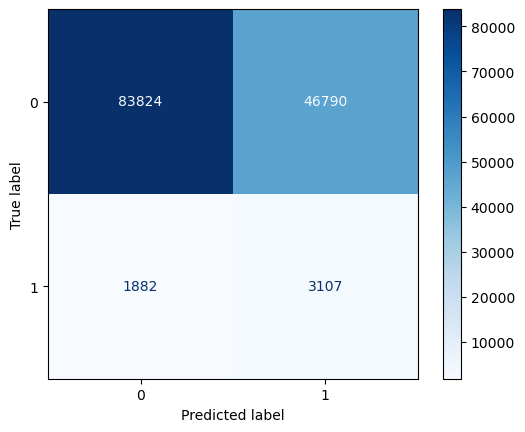

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Evaluating XGBoost...
ROC AUC for XGBoost: 0.7182

Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19955, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 542410, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036790 -> initscore=-3.265059
[LightGBM] [Info] Start training from score -3.265059
ROC AUC for LightGBM: 0.7208

Evaluating Logistic Regression...
ROC AUC for Logistic Regression: 0.6924



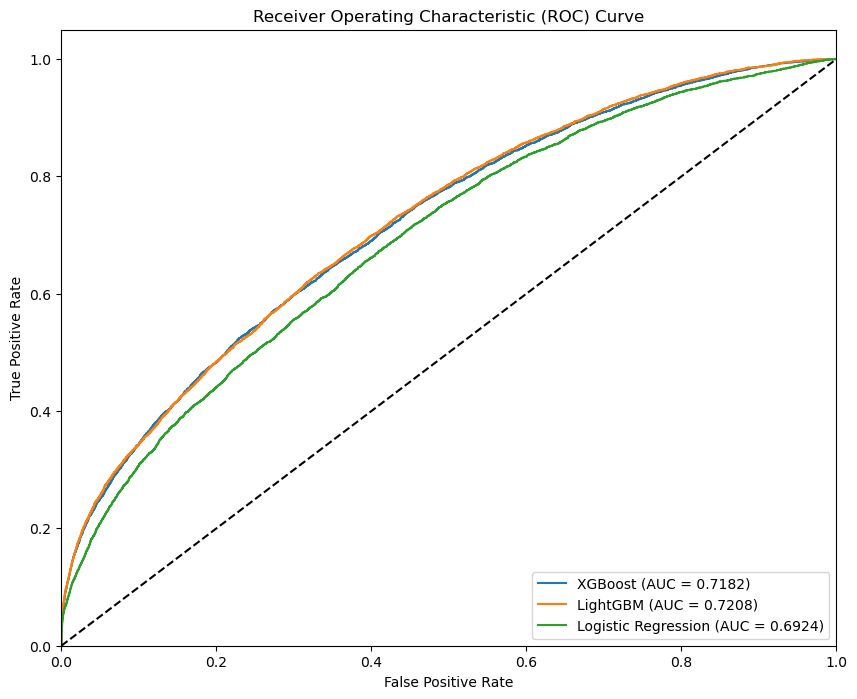

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10, 8))
for name, model in models:
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    
    # ROC AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"ROC AUC for {name}: {roc_auc:.4f}\n")
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### implementing SMOTE

In [82]:
from imblearn.over_sampling import SMOTE
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42)

# List of models
models = [
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model),
    ('Logistic Regression', logreg_model)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit and evaluate each model separately
for name, model in models:
    print(f"Evaluating {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    report = classification_report_imbalanced(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")

Evaluating XGBoost...
Classification Report for XGBoost:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.99      0.07      0.98      0.27      0.08    130614
          1       0.35      0.07      0.99      0.12      0.27      0.06      4989

avg / total       0.94      0.96      0.11      0.95      0.27      0.08    135603


Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 522455, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1793
[LightGBM] [Info] Number of data points in the train set: 1044910, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0000

In [84]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
import lightgbm as lgb

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
lgb_model = lgb.LGBMClassifier(class_weight=weight_dict)

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

# Output evaluation metrics
print("LightGBM Model with Class Weights")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report_imbalanced(y_test, y_test_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19955, number of negative: 522455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 542410, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM Model with Class Weights
Training Accuracy: 0.6647038218321933
Test Accuracy: 0.6596461730197709
Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.66      0.64      0.79      0.65      0.42    130614
          1       0.07      0.64      0.66      0.12      0.65  

In [75]:
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 3 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]